Project Name-PRCP-1016-HEART DISEASE PREDICTION

Team Members:

1.Ashish Ray Mohapatra

2.Ancil Xavier

3.Ramchandra Rao

## Business Case : Predicting whether the patient has heart disease or not

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Load the data

In [2]:
df1 = pd.read_csv('values.csv')

In [3]:
df1.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [4]:
df2 = pd.read_csv('labels.csv')

In [5]:
df2.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [6]:
#df2.drop('patient_id',axis=1,inplace=True) 

### Merging both the dataframes

In [7]:
#df = pd.concat([df1, df2], axis=1, join='outer')
df = df1.merge(df2[['patient_id','heart_disease_present']], on = 'patient_id', how = 'left')

In [8]:
df

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

## Domain Analysis

•Patient_id(type: categorical) => Represents the id of the patient

•Slope_of_peak_exercise_st_segment (type: int) => The slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart

•Thal (type: categorical) => Results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect. It measures your blood flow during rest and after exercise.

•Resting_blood_pressure (type: int) => Denotes resting blood pressure. A normal blood pressure level is  120/80 mmHg.

•Chest_pain_type (type: int) => Denotes the type of chest pain (4 values).

•Num_major_vessels (type: int)=> Number of major vessels (0-3) colored by flourosopy.

•Fasting_blood_sugar_gt_120_mg_per_dl (type: binary) => Denotes the blood sugar of the patient on fasting. The ideal case is less than 120 mg/dl. A value greater than 120 mg/dl indicates the patient has diabetes.

•Resting_ekg_results (type: int) => Represents the resting electrocardiographic results (values 0,1,2).

•Serum_cholesterol_mg_per_dl (type: int) => Denotes the serum cholestorol in mg/dl.

•Oldpeak_eq_st_depression (type: float) => Oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms

•Sex (type: binary)=> Represnts the sex of the patient ie. 0: female, 1: male.

•Age (type: int) => Age of the patient in years.

•Max_heart_rate_achieved (type: int) => Represents the maximum heart rate achieved for the patient(beats per minute)

•Exercise_induced_angina (type: binary) => Denotes the exercise-induced chest pain (0: False, 1: True)

•Heart_disease_present (type: binary) => This is the target variable(y). It signifies whether the patient has heart disease or not
 


In [10]:
## Renaming the columns

df.rename(columns={'slope_of_peak_exercise_st_segment':'ST_segment', 'thal':'thallium_stress','fasting_blood_sugar_gt_120_mg_per_dl':'fasting_blood_sugar','serum_cholesterol_mg_per_dl':'serum_cholesterol','oldpeak_eq_st_depression':'ST_depression','heart_disease_present':'Target'}, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   patient_id               180 non-null    object 
 1   ST_segment               180 non-null    int64  
 2   thallium_stress          180 non-null    object 
 3   resting_blood_pressure   180 non-null    int64  
 4   chest_pain_type          180 non-null    int64  
 5   num_major_vessels        180 non-null    int64  
 6   fasting_blood_sugar      180 non-null    int64  
 7   resting_ekg_results      180 non-null    int64  
 8   serum_cholesterol        180 non-null    int64  
 9   ST_depression            180 non-null    float64
 10  sex                      180 non-null    int64  
 11  age                      180 non-null    int64  
 12  max_heart_rate_achieved  180 non-null    int64  
 13  exercise_induced_angina  180 non-null    int64  
 14  Target                   1

In [12]:
df.ST_segment.unique()

array([1, 2, 3], dtype=int64)

In [13]:
df.thallium_stress.unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [14]:
df.resting_blood_pressure.unique()

array([128, 110, 125, 152, 178, 130, 150, 170, 120, 140, 138, 144, 136,
       160, 108, 106, 156, 180, 112, 122, 124, 135, 105, 115, 126, 172,
       145, 118, 134, 100, 155, 132, 102,  94, 117, 142], dtype=int64)

In [15]:
df.chest_pain_type.unique()

array([2, 3, 4, 1], dtype=int64)

In [16]:
df.num_major_vessels.unique()

array([0, 3, 2, 1], dtype=int64)

In [17]:
df.fasting_blood_sugar.unique()

array([0, 1], dtype=int64)

In [18]:
df.resting_ekg_results.unique()

array([2, 0, 1], dtype=int64)

In [19]:
df.serum_cholesterol.unique()

array([308, 214, 304, 223, 270, 180, 258, 276, 326, 219, 302, 226, 335,
       236, 231, 200, 234, 253, 204, 319, 233, 228, 245, 211, 303, 205,
       185, 175, 225, 203, 325, 230, 222, 126, 209, 269, 255, 243, 252,
       265, 417, 267, 261, 149, 281, 311, 315, 330, 256, 239, 295, 197,
       564, 305, 283, 160, 254, 282, 322, 250, 188, 220, 199, 215, 218,
       196, 266, 229, 259, 268, 177, 168, 262, 271, 299, 293, 141, 277,
       212, 321, 294, 313, 232, 289, 213, 274, 263, 244, 298, 172, 353,
       210, 192, 246, 286, 360, 174, 227, 248, 224, 300, 235, 217, 193,
       167, 216, 195, 309, 273, 198, 290, 275, 206, 164, 207, 249, 327,
       201], dtype=int64)

In [20]:
df.ST_depression.unique()

array([0. , 1.6, 4.2, 2.6, 0.6, 3.4, 0.4, 0.2, 3.8, 0.9, 1.4, 0.1, 0.3,
       2.3, 1.5, 3. , 2. , 1. , 3.1, 2.5, 0.8, 2.4, 1.8, 1.9, 2.8, 1.2,
       0.5, 2.2, 1.3, 1.1, 0.7, 3.2, 5.6, 6.2])

In [21]:
df.sex.unique()

array([1, 0], dtype=int64)

In [22]:
df.age.unique()

array([45, 54, 77, 40, 59, 42, 60, 57, 50, 66, 64, 38, 29, 58, 71, 52, 67,
       70, 68, 51, 41, 65, 53, 48, 62, 74, 61, 63, 46, 43, 56, 44, 35, 55,
       49, 47, 37, 69, 39, 34], dtype=int64)

In [23]:
df.max_heart_rate_achieved.unique()

array([170, 158, 162, 181, 145, 150, 157, 112, 140, 151, 178, 152, 182,
       126, 175, 144, 202, 147, 142, 138, 143, 115, 159, 184, 155, 123,
       168, 114, 154, 165, 186, 173, 163, 121, 161, 137, 172, 130, 167,
       141, 166, 125, 103, 120, 132, 169, 179,  99, 177, 160, 156, 109,
       139, 134, 113, 149, 174, 131, 148, 153, 133, 122, 105, 106, 192,
       108,  96, 171, 180, 188, 111,  97, 117], dtype=int64)

In [24]:
df.exercise_induced_angina.unique()

array([0, 1], dtype=int64)

In [25]:
df

,patient_id,ST_segment,thallium_stress,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar,resting_ekg_results,serum_cholesterol,ST_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,Target
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [26]:
## Copying the dataframe to a new variable
data = df

## Exploratory Data Analysis [EDA]

### Univariate Analysis-- Analyzing Single Variable 


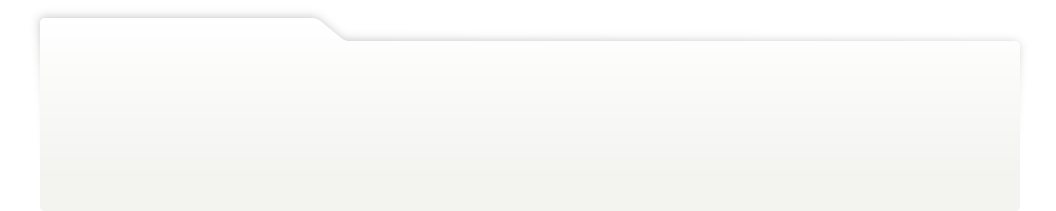
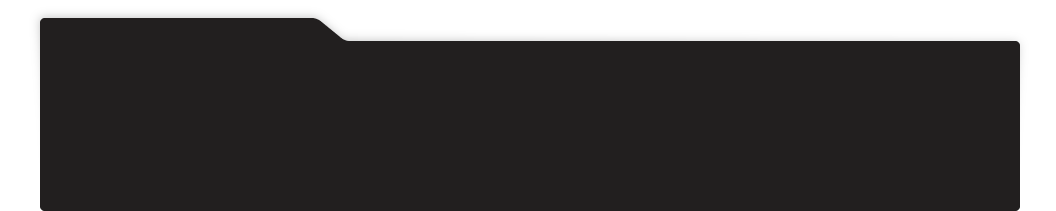
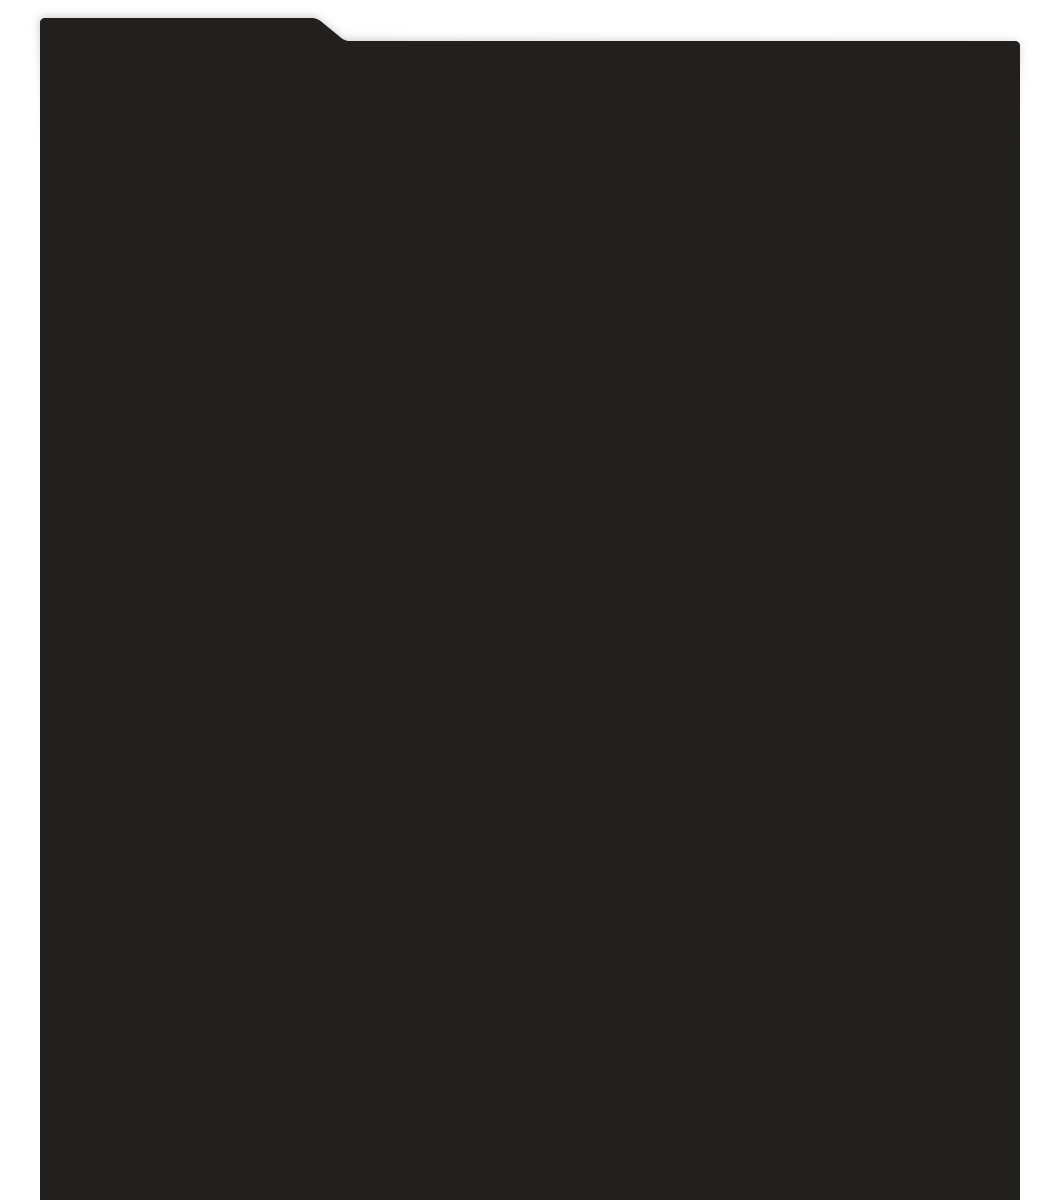
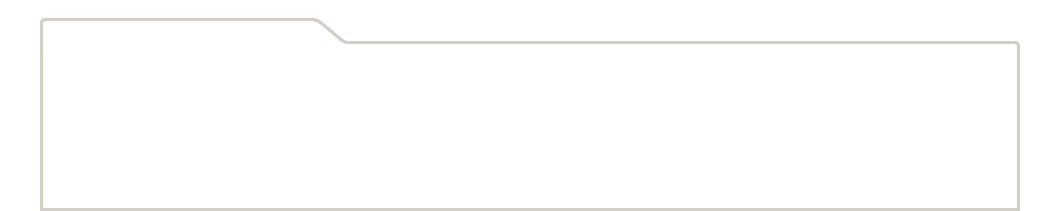
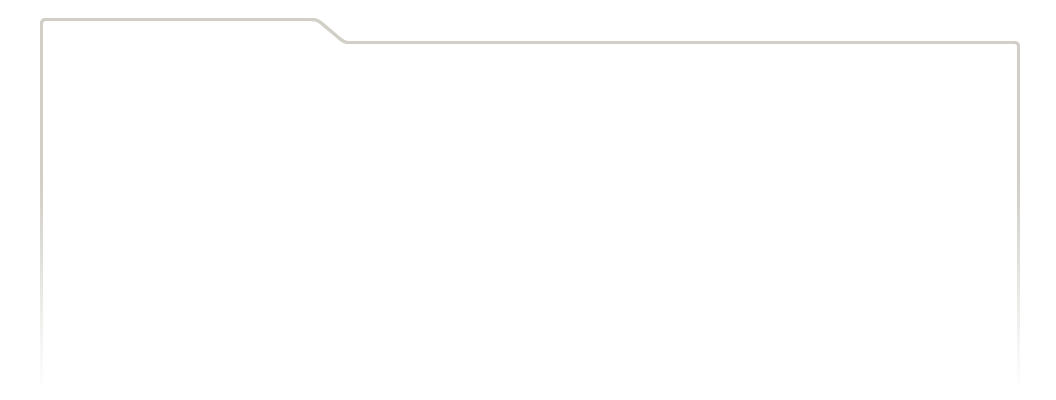
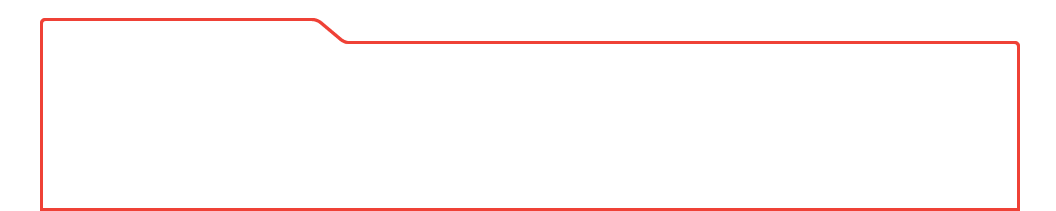
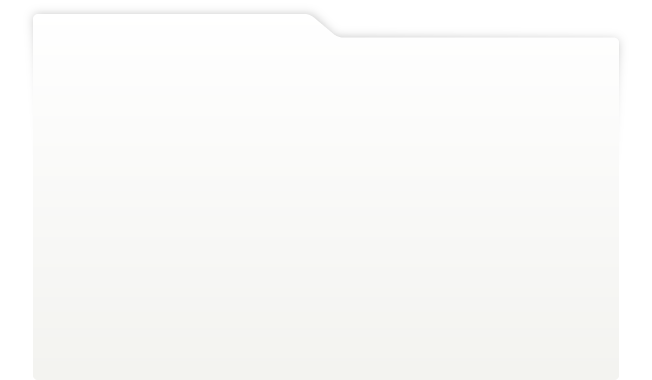
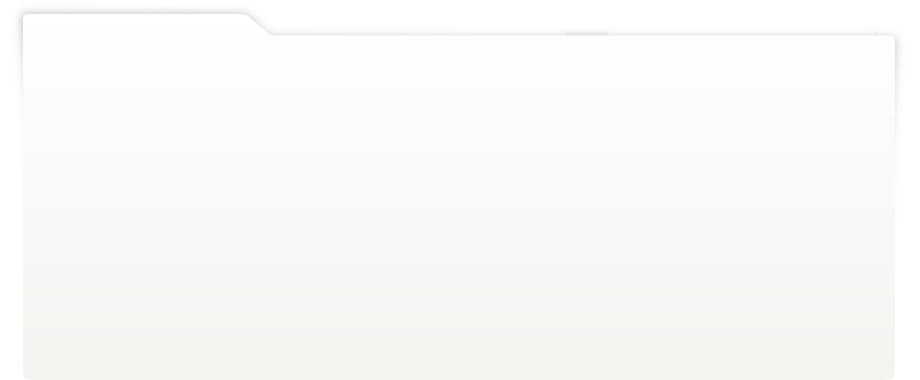
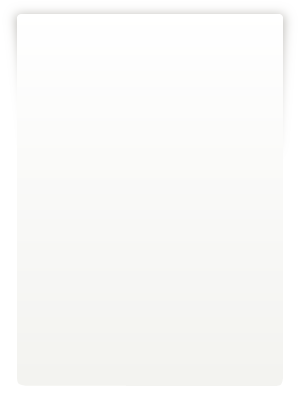
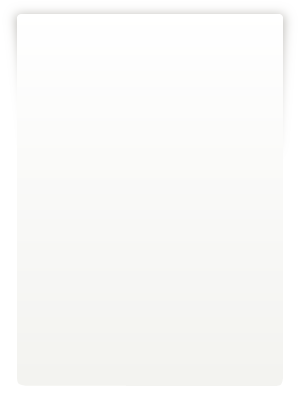
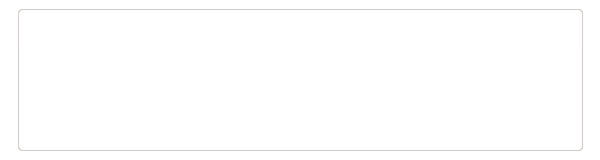
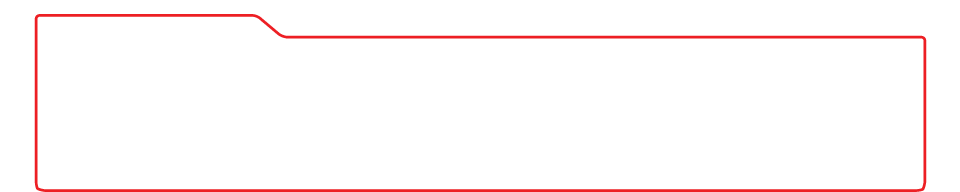
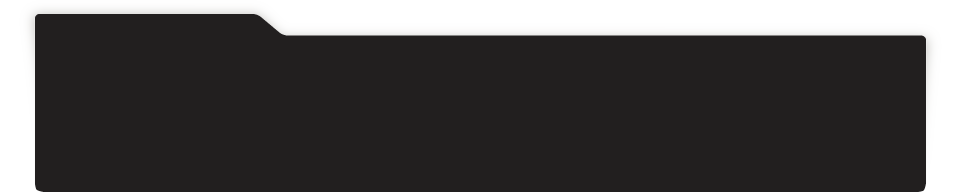
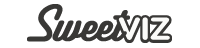
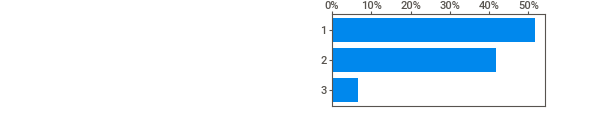
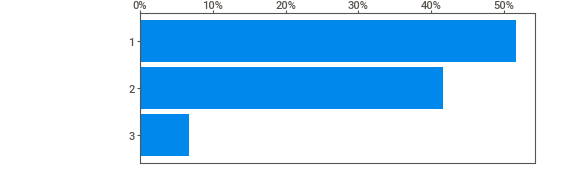
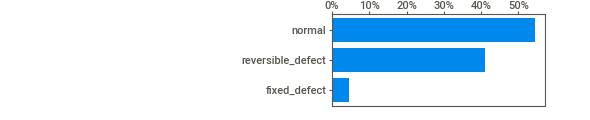
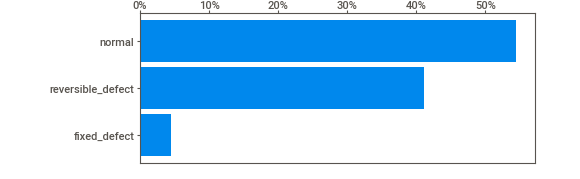
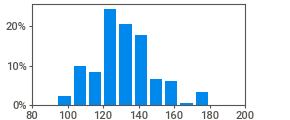
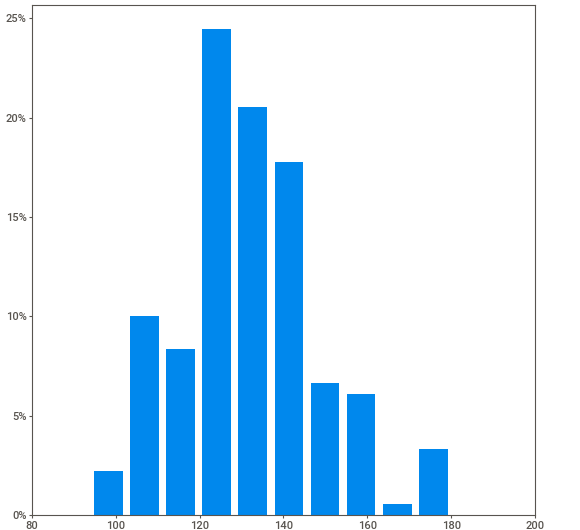
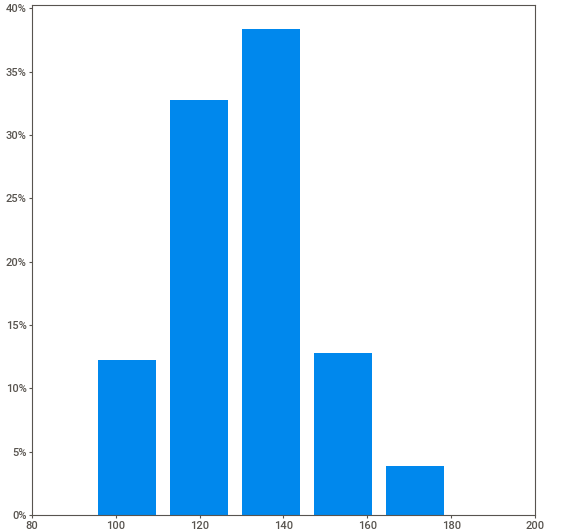
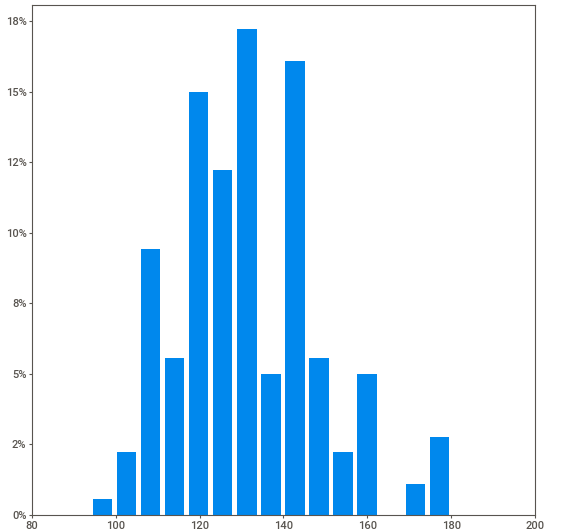
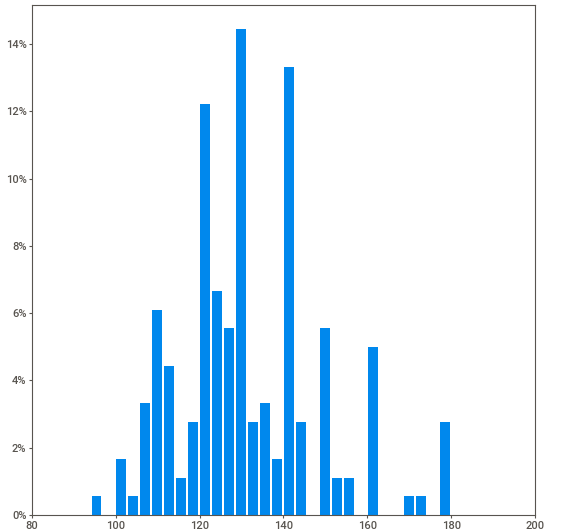
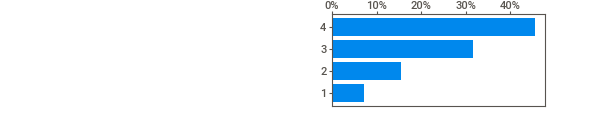
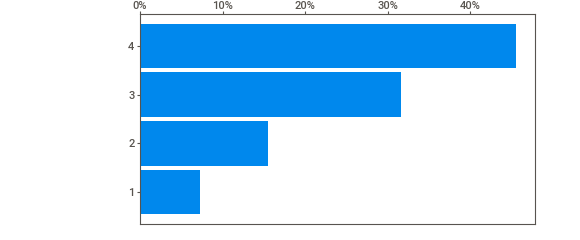
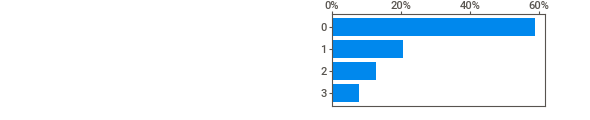
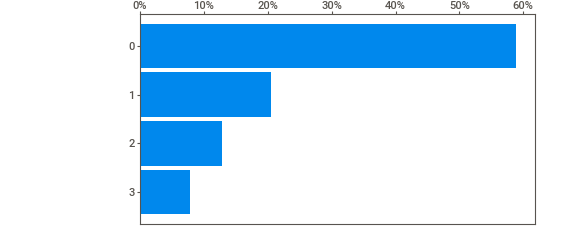
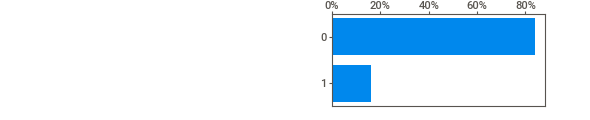
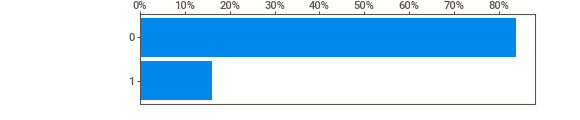
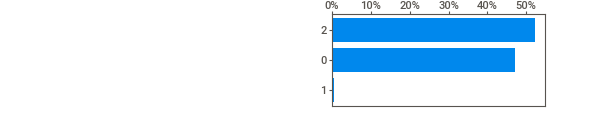
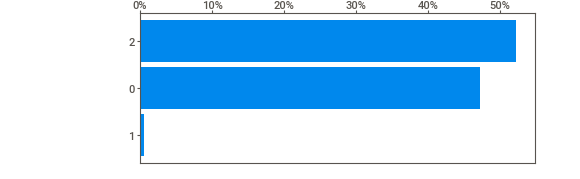
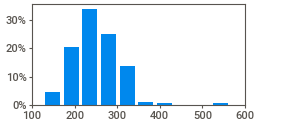
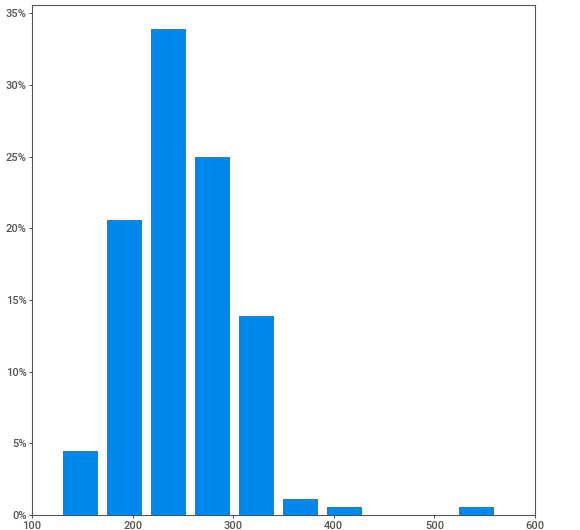
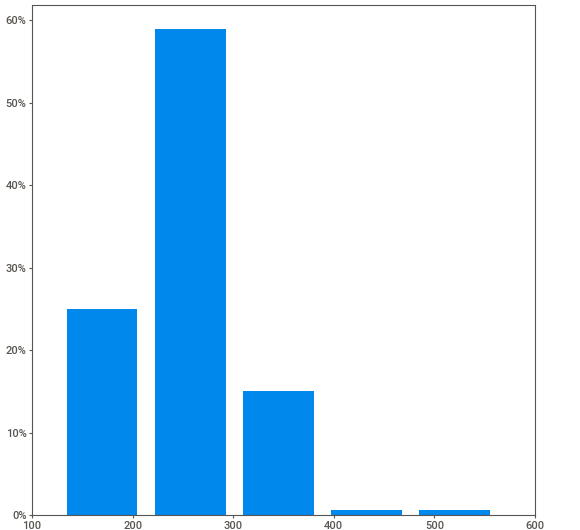
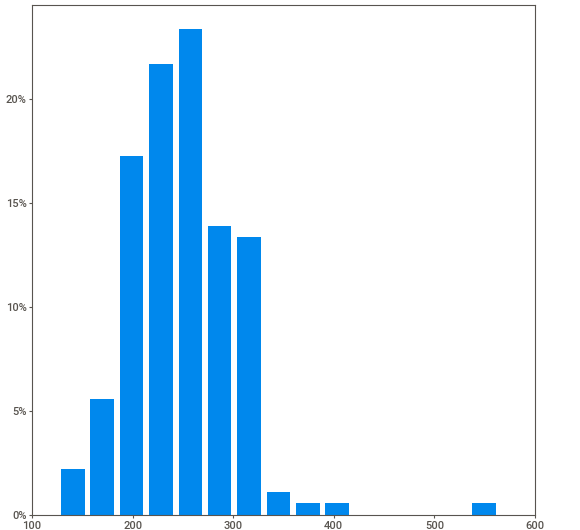
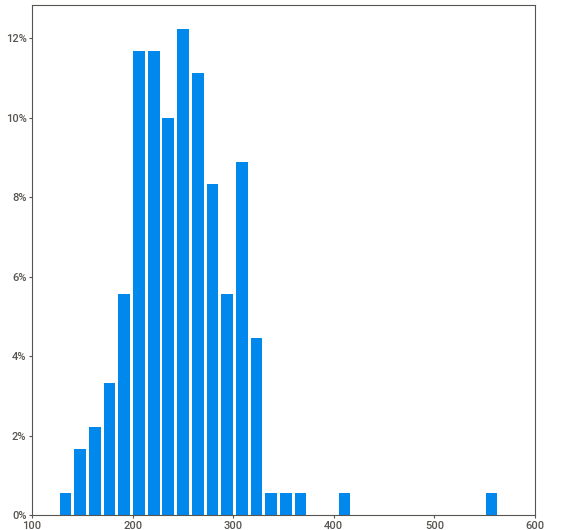
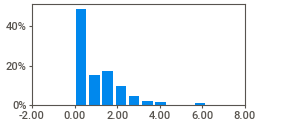
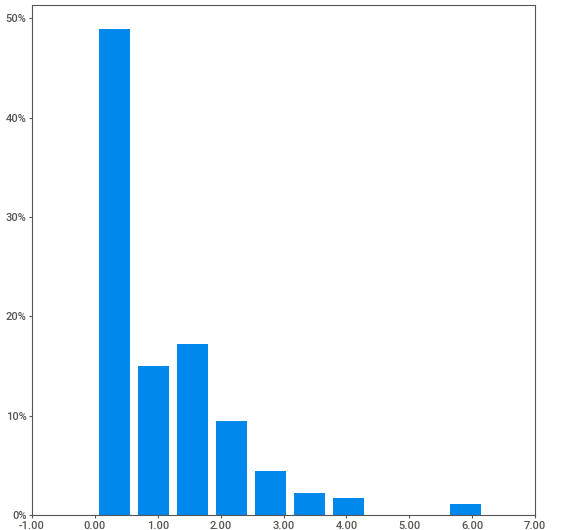
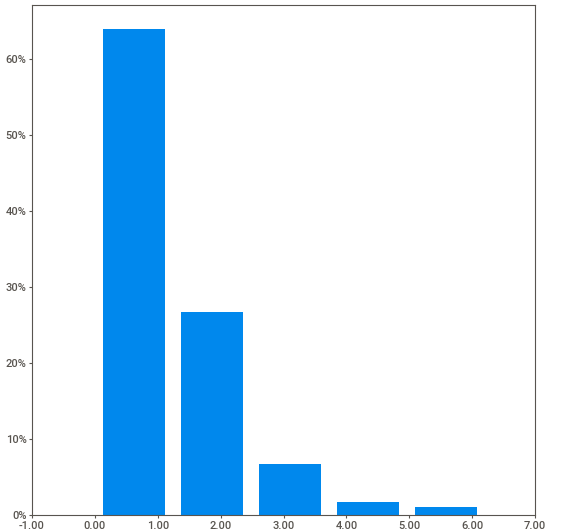
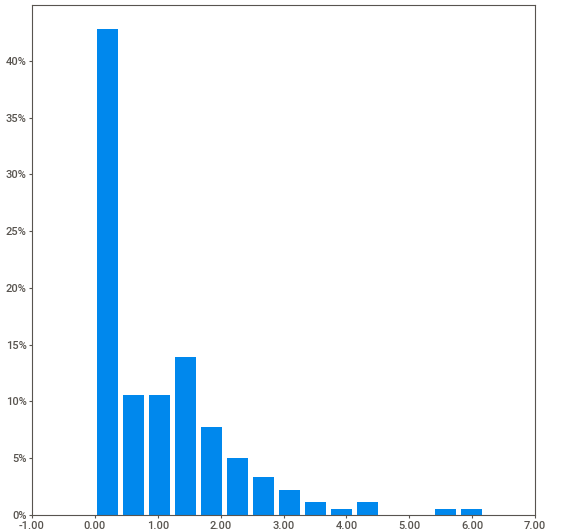
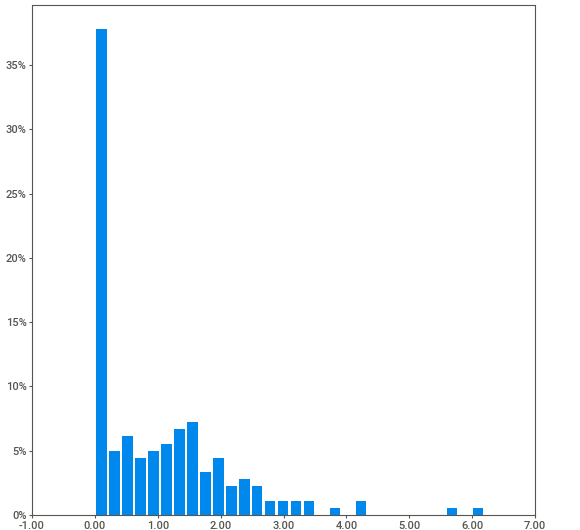
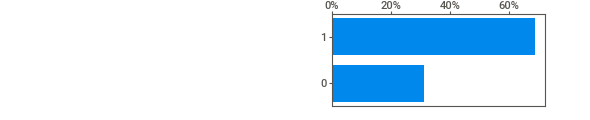
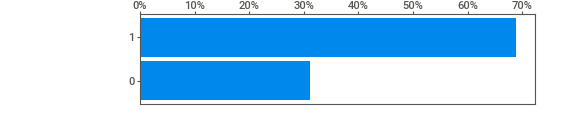
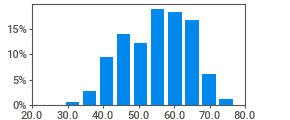
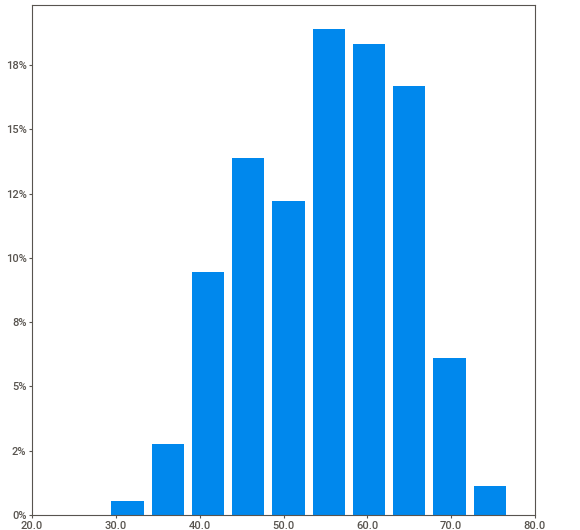
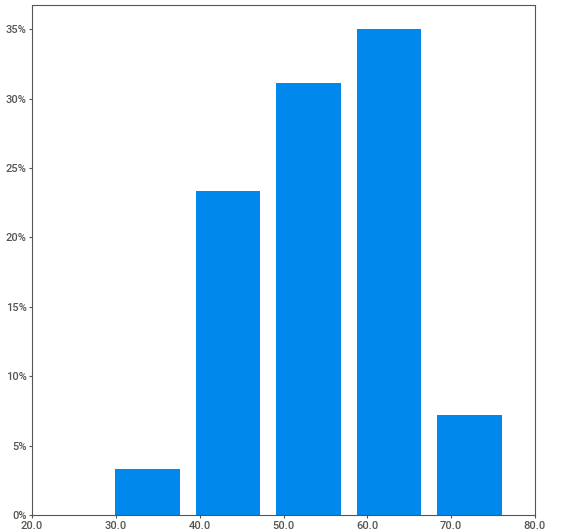
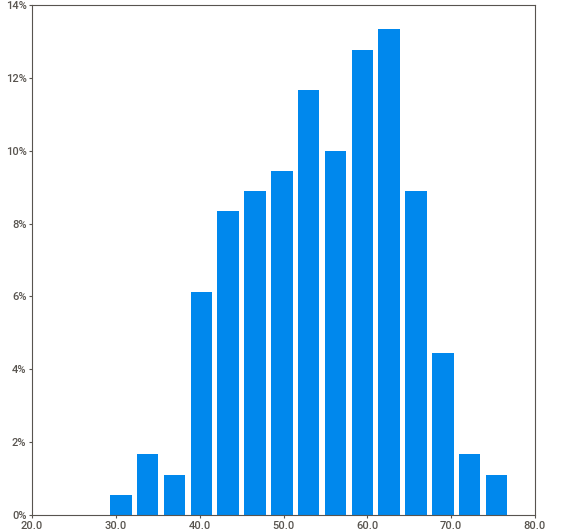
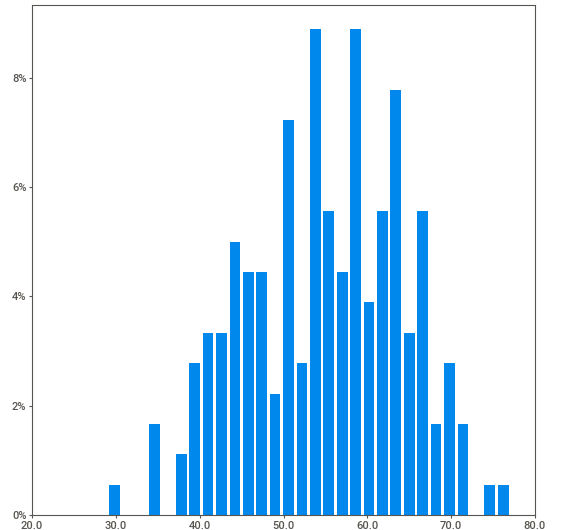
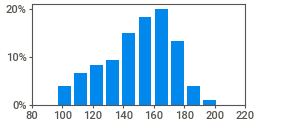
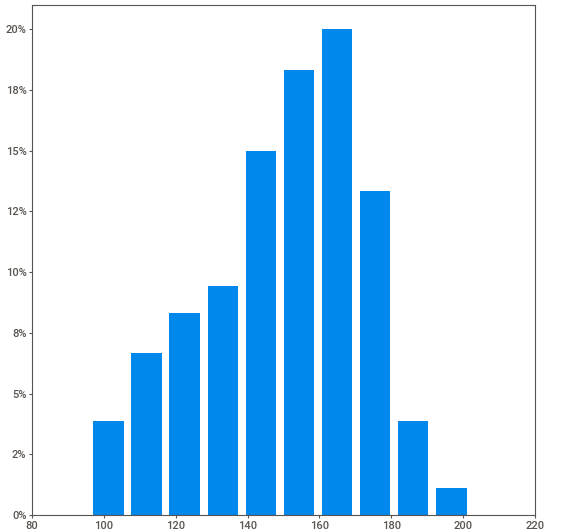
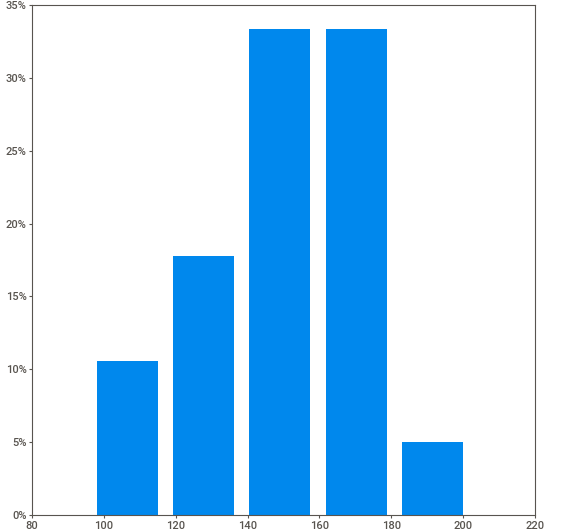
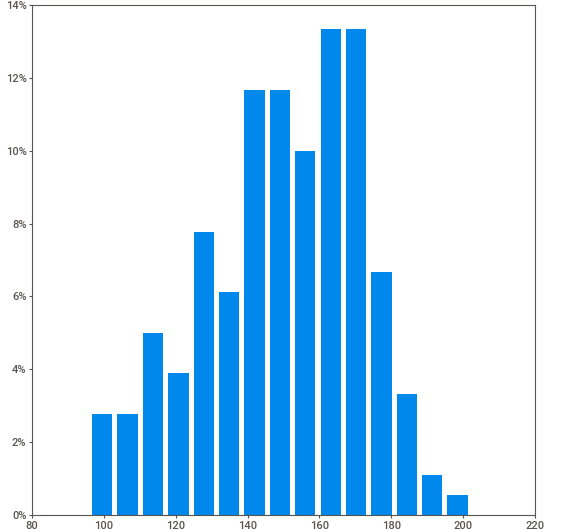
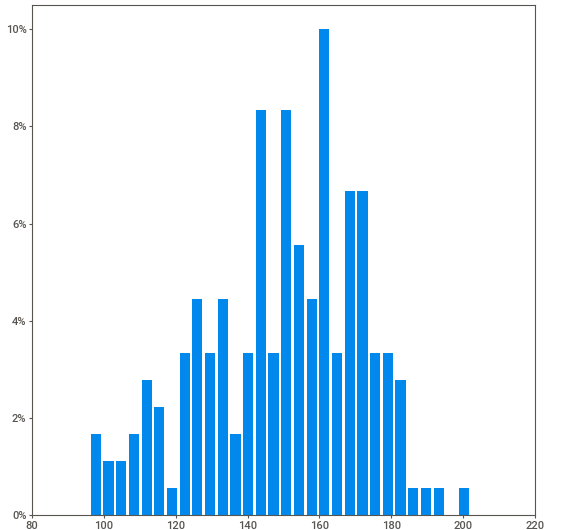
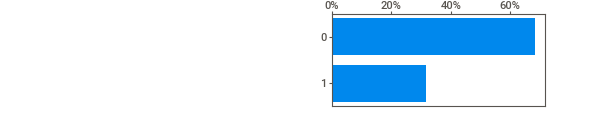
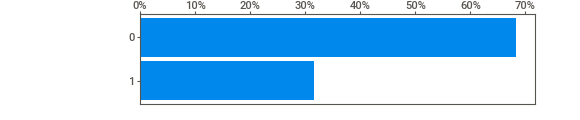
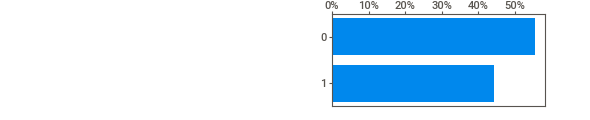
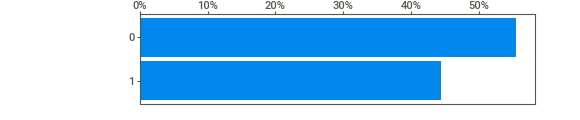
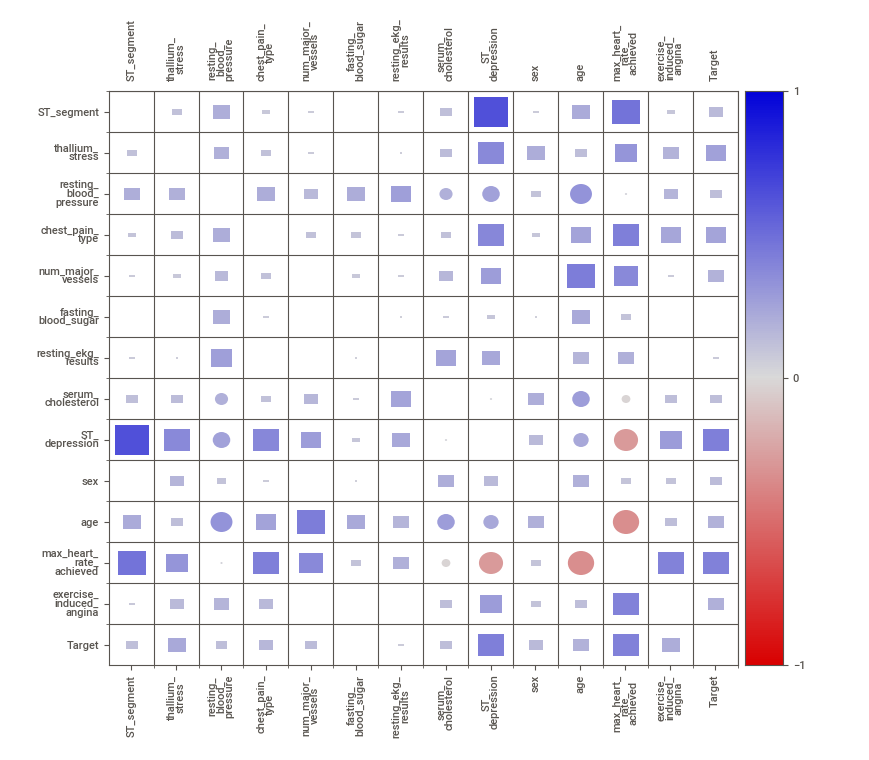
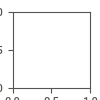

In [27]:
import sweetviz as sv
my_report = sv.analyze(data)## pass the original dataframe
my_report.show_notebook() 

In [28]:
data.sex.value_counts()

1    124
0     56
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

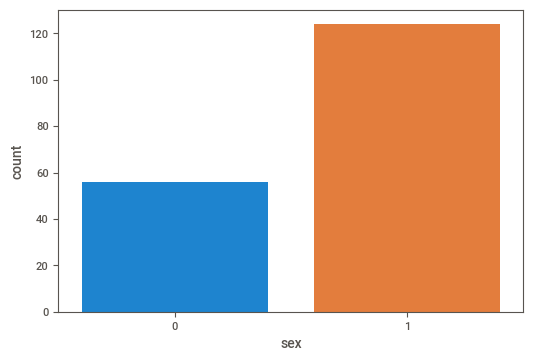

In [29]:
sns.countplot(x='sex',data=data)

<AxesSubplot:xlabel='thallium_stress', ylabel='count'>

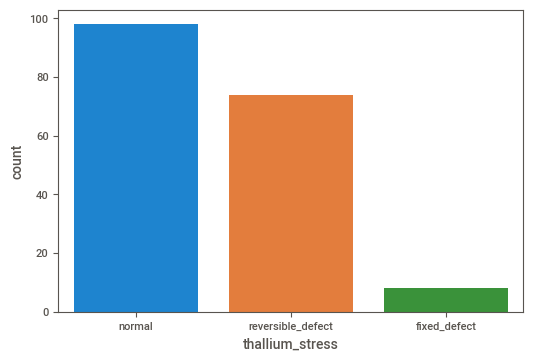

In [30]:
data.thallium_stress.value_counts()
sns.countplot(x='thallium_stress',data=data)

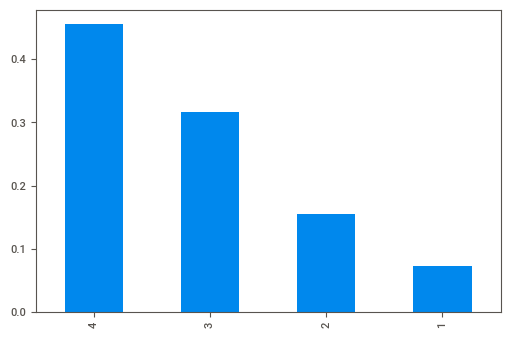

In [31]:
data.chest_pain_type.value_counts(normalize=True).plot.bar()
plt.show()

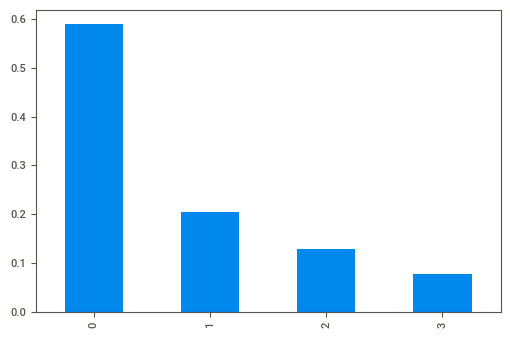

In [32]:
data.num_major_vessels.value_counts(normalize=True).plot.bar()
plt.show()

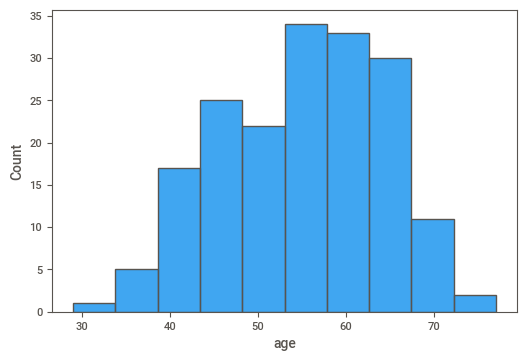

In [33]:
sns.histplot(data.age.dropna(axis=0))
plt.show()

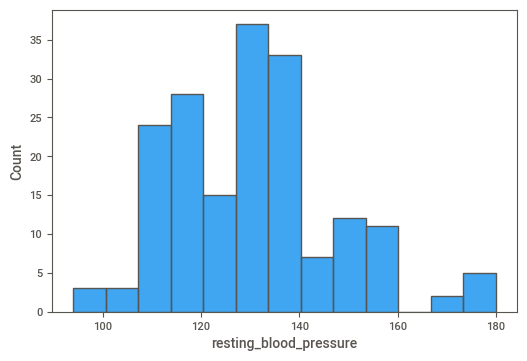

In [34]:
sns.histplot(data.resting_blood_pressure.dropna(axis=0))
plt.show()

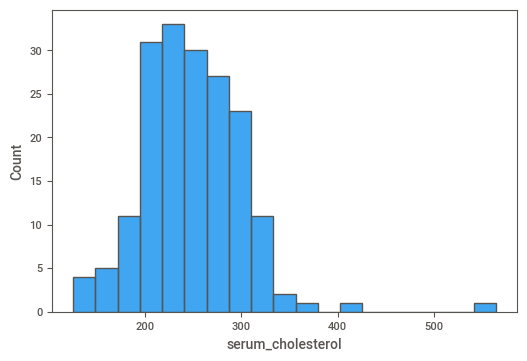

In [35]:
sns.histplot(data.serum_cholesterol.dropna(axis=0))
plt.show()

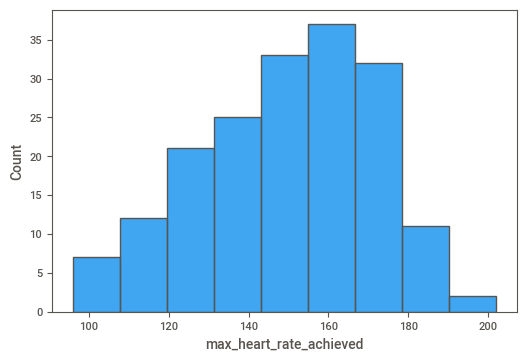

In [36]:
sns.histplot(data.max_heart_rate_achieved.dropna(axis=0))
plt.show()

### Insights
============

- From the sweetviz report, it can be observed that 56 patients are females while 124 are males. 


- For the thallium stress test, it was observed that almost 100 patients were found to be normal. Almost 76 patients were found to fall in the 'reversible-defect' category and less than 10 patients had fixed-defect.


- For the slope of the peak exercise ST segment, it was observed that more than 50% of the patients showed type1[unsloping] and almost 42% showed Type 2[flat] and almost 7% showed type 3[downsloping]


- For resting blood pressure, only 20% of the patients had fallen in the permissible range of 120/80 mmHg. More than 80% of the patients had high resting blood pressure.


- For chest pain type, 4 types of patients were found. Almsot 45% of the patients showed type 4[asymptomatic] chest pain wheresas 32% of the patients showed Type 3[non-anginal pain] and almost 15% of the patients showed Type 2[Atypical angina]. Only 7% of the patients showed Type 1 chest pain[Typical angina]


- For number of major vessels colored by flouroscopy, it was observed that for 58% of the patients, no major blood vessel was colored whereas for 20% of the patients, 1 major vessel was colored by flouroscopy. For 12% of the patients, 2 major vessels were colored and for 10% of the patients, 3 major blood vessels are colored by flouroscopy


- For exercise induced angina or exercise induced heart-pain, it was observed that about 70% of the patients showed no symptoms of exercise induced angina while 30% showed symptoms of exercise induced angina.



- For fasting blood sugar almost 82% of the patients were found to be normal while 18% was found to be under the risky category.


- Majority of the patients were found to be within the age group of 55 to 65.


- Almost 70% of the patients showed high resting blood pressure ie. more than 120 mmHg. Only 30% of the patients showed normal resting pressure


### Bivariate Analysis

In [37]:
data.columns

Index(['patient_id', 'ST_segment', 'thallium_stress', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels', 'fasting_blood_sugar',
       'resting_ekg_results', 'serum_cholesterol', 'ST_depression', 'sex',
       'age', 'max_heart_rate_achieved', 'exercise_induced_angina', 'Target'],
      dtype='object')

In [38]:
data1 = data[['ST_segment', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels', 'fasting_blood_sugar',
       'resting_ekg_results', 'serum_cholesterol', 'ST_depression','sex','age','max_heart_rate_achieved', 'exercise_induced_angina']]

In [39]:
data1

,ST_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar,resting_ekg_results,serum_cholesterol,ST_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,128,2,0,0,2,308,0.0,1,45,170,0
1,2,110,3,0,0,0,214,1.6,0,54,158,0
2,1,125,4,3,0,2,304,0.0,1,77,162,1
3,1,152,4,0,0,0,223,0.0,1,40,181,0
4,3,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,125,4,2,1,0,254,0.2,1,67,163,0
176,2,180,4,0,0,1,327,3.4,0,55,117,1
177,2,125,3,0,0,0,309,1.8,1,64,131,1
178,1,124,3,2,1,0,255,0.0,1,48,175,0


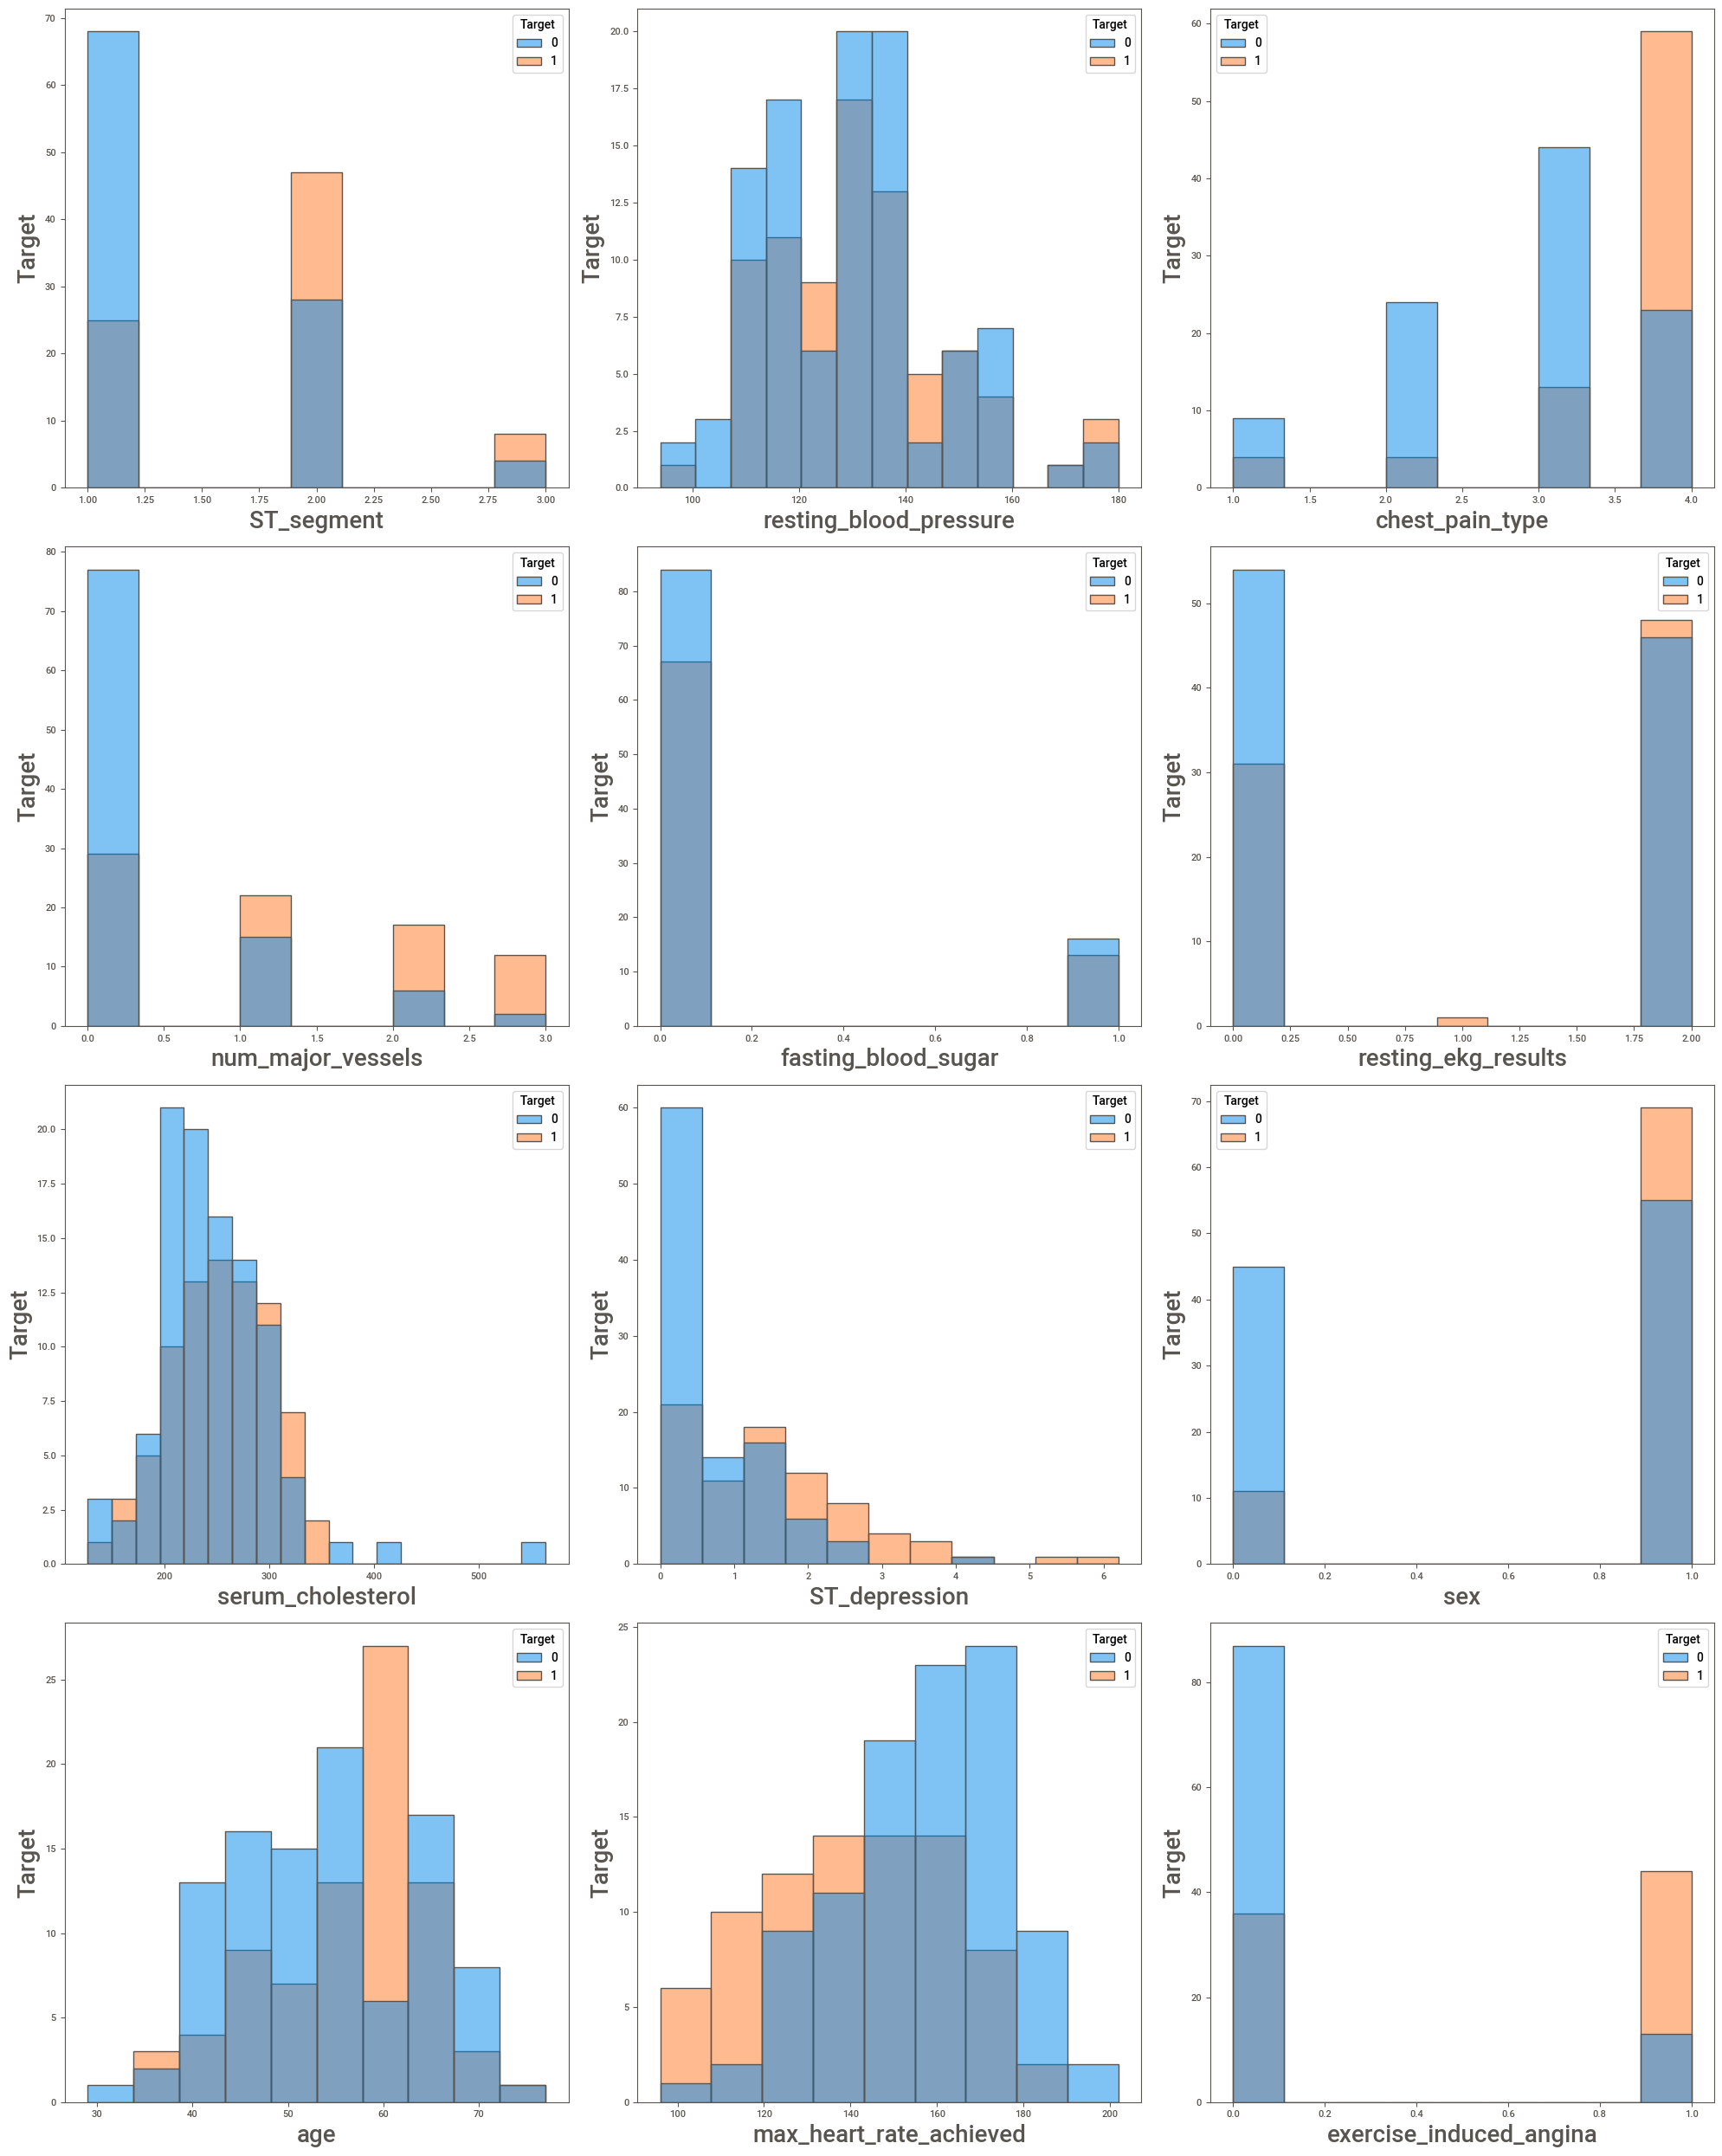

In [40]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=12 :
        ax = plt.subplot(4,3,plotnumber)
        sns.histplot(x=data1[column],hue=data.Target)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Target',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Insights

* ST_segment - It shows the quality of blood flow in the scale of 0-3. When the scale indicates 2 , chances of heart disease is almost 40%. But when the scale indicates 3,the chances increases to 50%.



* Resting_blood_pressure - When the resting blood pressure falls in the range of 120-130,140-150 and 170-180, the chance of heart disease is more as compared to other blood pressure ranges.


* Chest_pain_type - When a person has chest pain type4[asymptomatic] then 70% chances are there that the person has some heart disease as compared to other chest pain types.


* Num_major_vessels - It categorizes within the range of 0-4. The chances of heart disease in case of 0 class is less as compared to other classes , the chances of heart disease gradually increases from class 1-3. In class 1 it is 30% whereas in class 2 it is 70% and in class 3  it is 80%.


* Fasting_blood_sugar - It has least role in predicting heart disease.



* Resting_ekg_results - When it has value 1 which indicates the person has heart disease for sure. In value 2 the chances of heart disease is less but still present.   



* Serum_cholesterol -  In the range of 300-350 of serum_cholestrol , the chances of heart disease is more as compared to any other range.



* ST_depression - When it lies in the range of 1.5-2.5, the chances of heart disease is about 50% whereas in the range of 2.8-4 and 5-6, 100% chances are present for heart disease.



* Sex - Males are prone to heart disease than females.



* Age -The chances of heart disease is 30% for patients aged between 35 to 40. When the age lies between 58-62 ,80-90% chances are there that the person has a heart disease.



* Max_heart_rate_achieved - When max_heart_rate_achieved lies in the range of 100-120, more than 70% chances are there to have a heart disease. When it lies in the range of 120-140, the chances of having heart disease is almost 20%.



* Exercise_induced_angina - It has 2 unique features. When it lies in class-1 , 60-70% chances are present for suffering from heart disease.






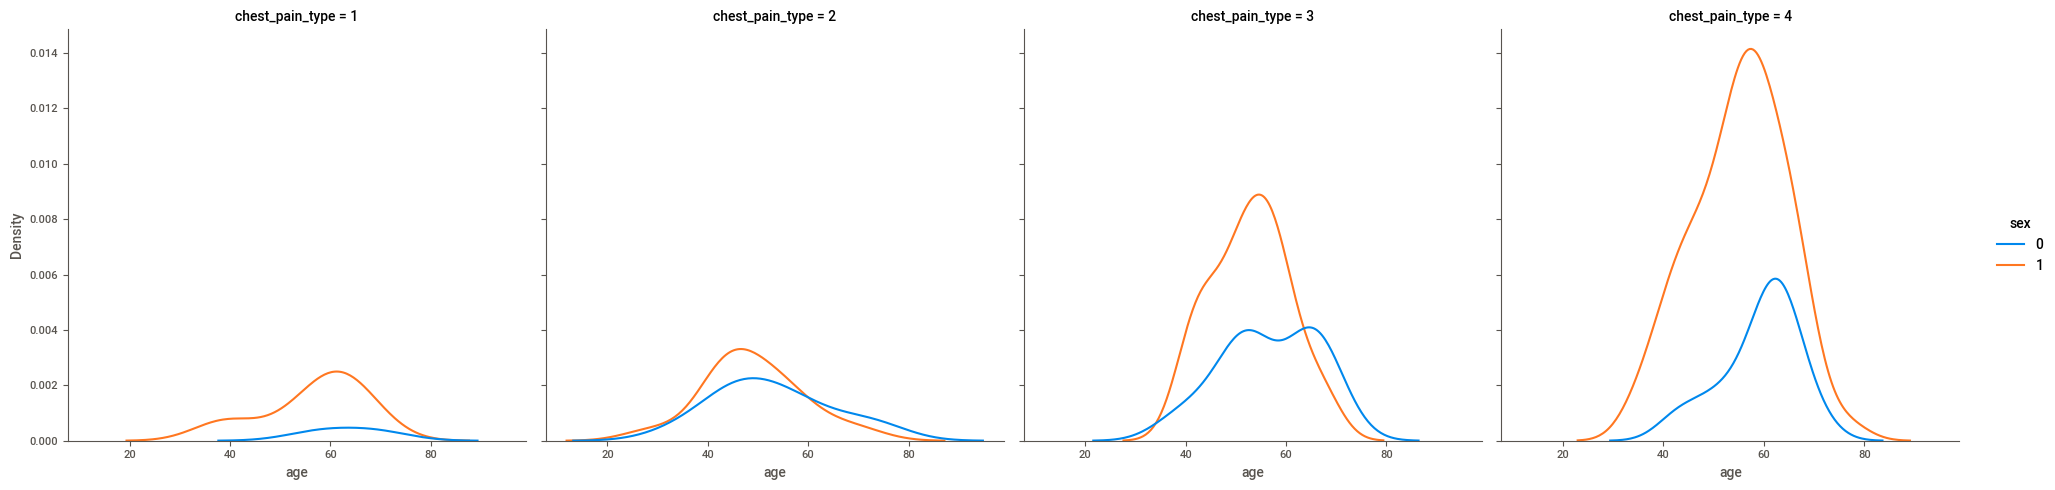

In [41]:
sns.displot(data=data,x='age',col='chest_pain_type',color='c',hue='sex',kind='kde')


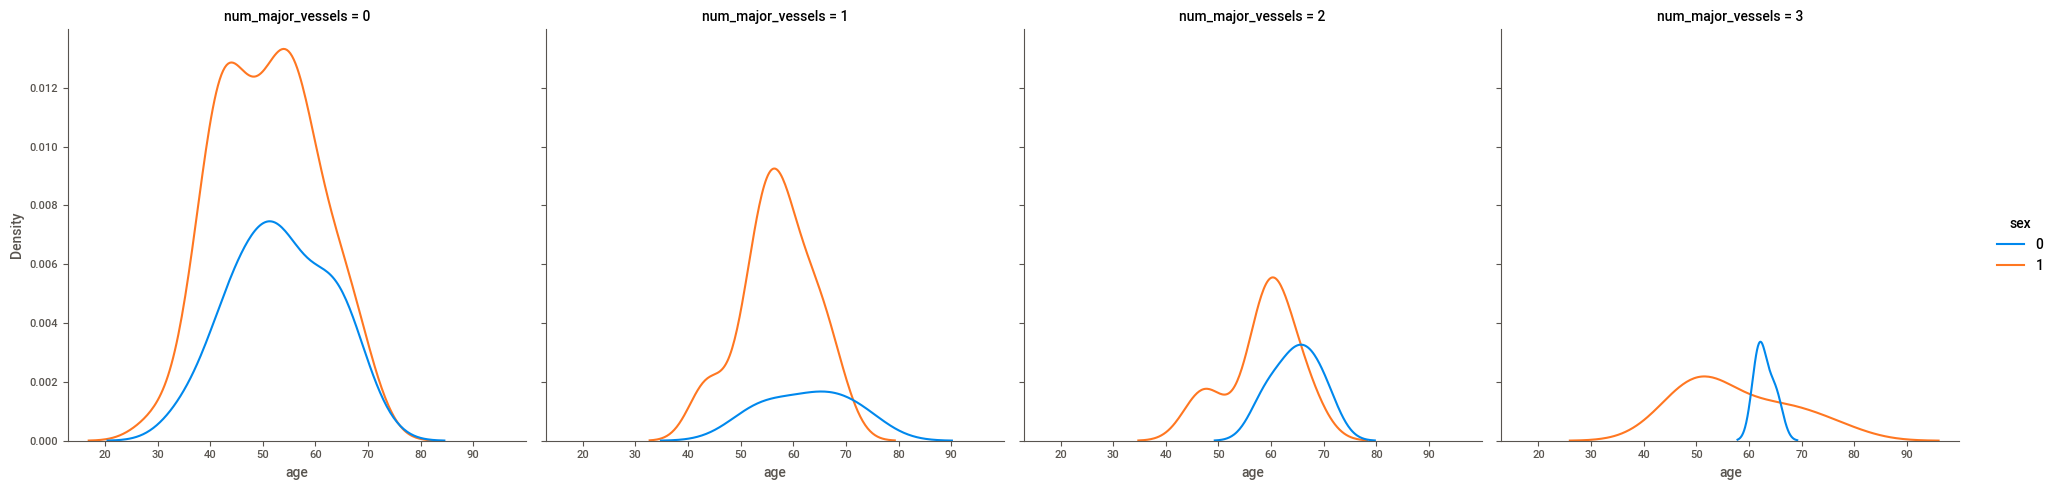

In [42]:
sns.displot(data=data,x='age',col='num_major_vessels',color='c',hue='sex',kind='kde')

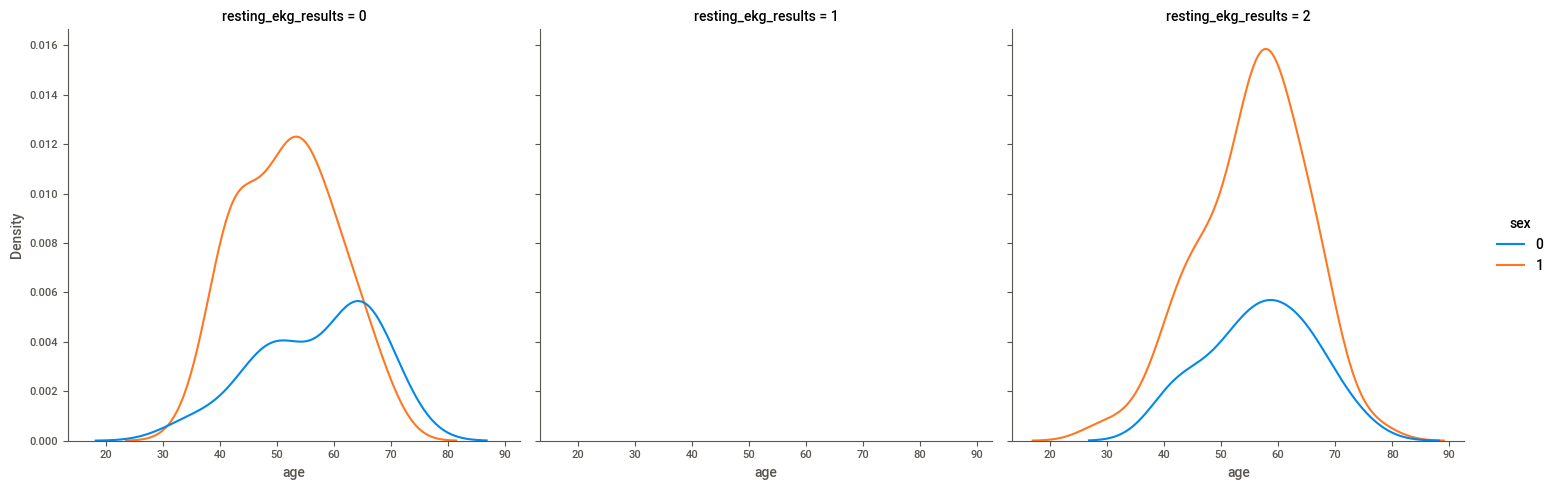

In [43]:
sns.displot(data=data,x='age',col='resting_ekg_results',color='c',hue='sex',kind='kde')


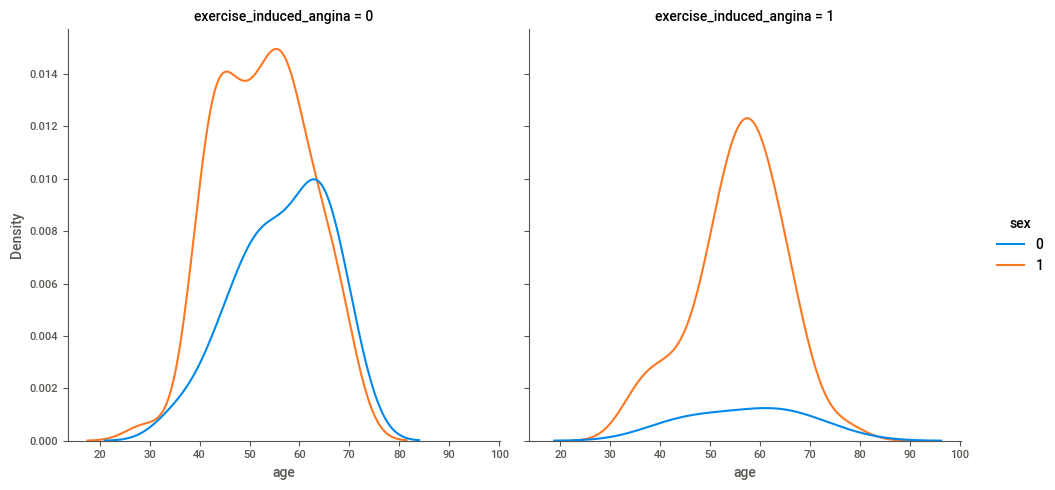

In [44]:
sns.displot(data=data,x='age',col='exercise_induced_angina',color='c',hue='sex',kind='kde')


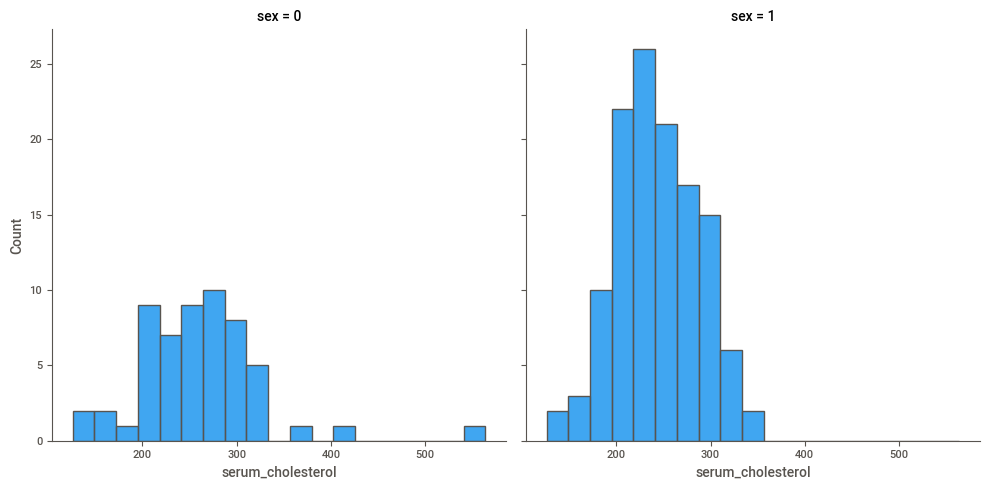

In [45]:
sns.displot(data, x='serum_cholesterol', col='sex')

# Data Preprocessing

## Missing Value Treatment

In [46]:
# Checking for missing values 
data.isnull().sum()

# As seen no  missing values are present.

patient_id                 0
ST_segment                 0
thallium_stress            0
resting_blood_pressure     0
chest_pain_type            0
num_major_vessels          0
fasting_blood_sugar        0
resting_ekg_results        0
serum_cholesterol          0
ST_depression              0
sex                        0
age                        0
max_heart_rate_achieved    0
exercise_induced_angina    0
Target                     0
dtype: int64

## Outlier Treatments

### Outlier Treatment for Numerical Features

In [47]:
# now checking outlier for numerical features.

In [48]:
data.shape

(180, 15)

In [49]:
data

,patient_id,ST_segment,thallium_stress,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar,resting_ekg_results,serum_cholesterol,ST_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,Target
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [50]:
data.columns

Index(['patient_id', 'ST_segment', 'thallium_stress', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels', 'fasting_blood_sugar',
       'resting_ekg_results', 'serum_cholesterol', 'ST_depression', 'sex',
       'age', 'max_heart_rate_achieved', 'exercise_induced_angina', 'Target'],
      dtype='object')

In [51]:
data.dtypes

patient_id                  object
ST_segment                   int64
thallium_stress             object
resting_blood_pressure       int64
chest_pain_type              int64
num_major_vessels            int64
fasting_blood_sugar          int64
resting_ekg_results          int64
serum_cholesterol            int64
ST_depression              float64
sex                          int64
age                          int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
Target                       int64
dtype: object

In [52]:
## data1 contains numerical features
# creating new data frame data1
data1 = data[['ST_segment','resting_blood_pressure','chest_pain_type','num_major_vessels','fasting_blood_sugar','resting_ekg_results','serum_cholesterol','ST_depression','sex','age','max_heart_rate_achieved','exercise_induced_angina']]
data1

,ST_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar,resting_ekg_results,serum_cholesterol,ST_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,128,2,0,0,2,308,0.0,1,45,170,0
1,2,110,3,0,0,0,214,1.6,0,54,158,0
2,1,125,4,3,0,2,304,0.0,1,77,162,1
3,1,152,4,0,0,0,223,0.0,1,40,181,0
4,3,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,125,4,2,1,0,254,0.2,1,67,163,0
176,2,180,4,0,0,1,327,3.4,0,55,117,1
177,2,125,3,0,0,0,309,1.8,1,64,131,1
178,1,124,3,2,1,0,255,0.0,1,48,175,0


### Using distribution plots

In [53]:
import warnings
warnings.filterwarnings('ignore')

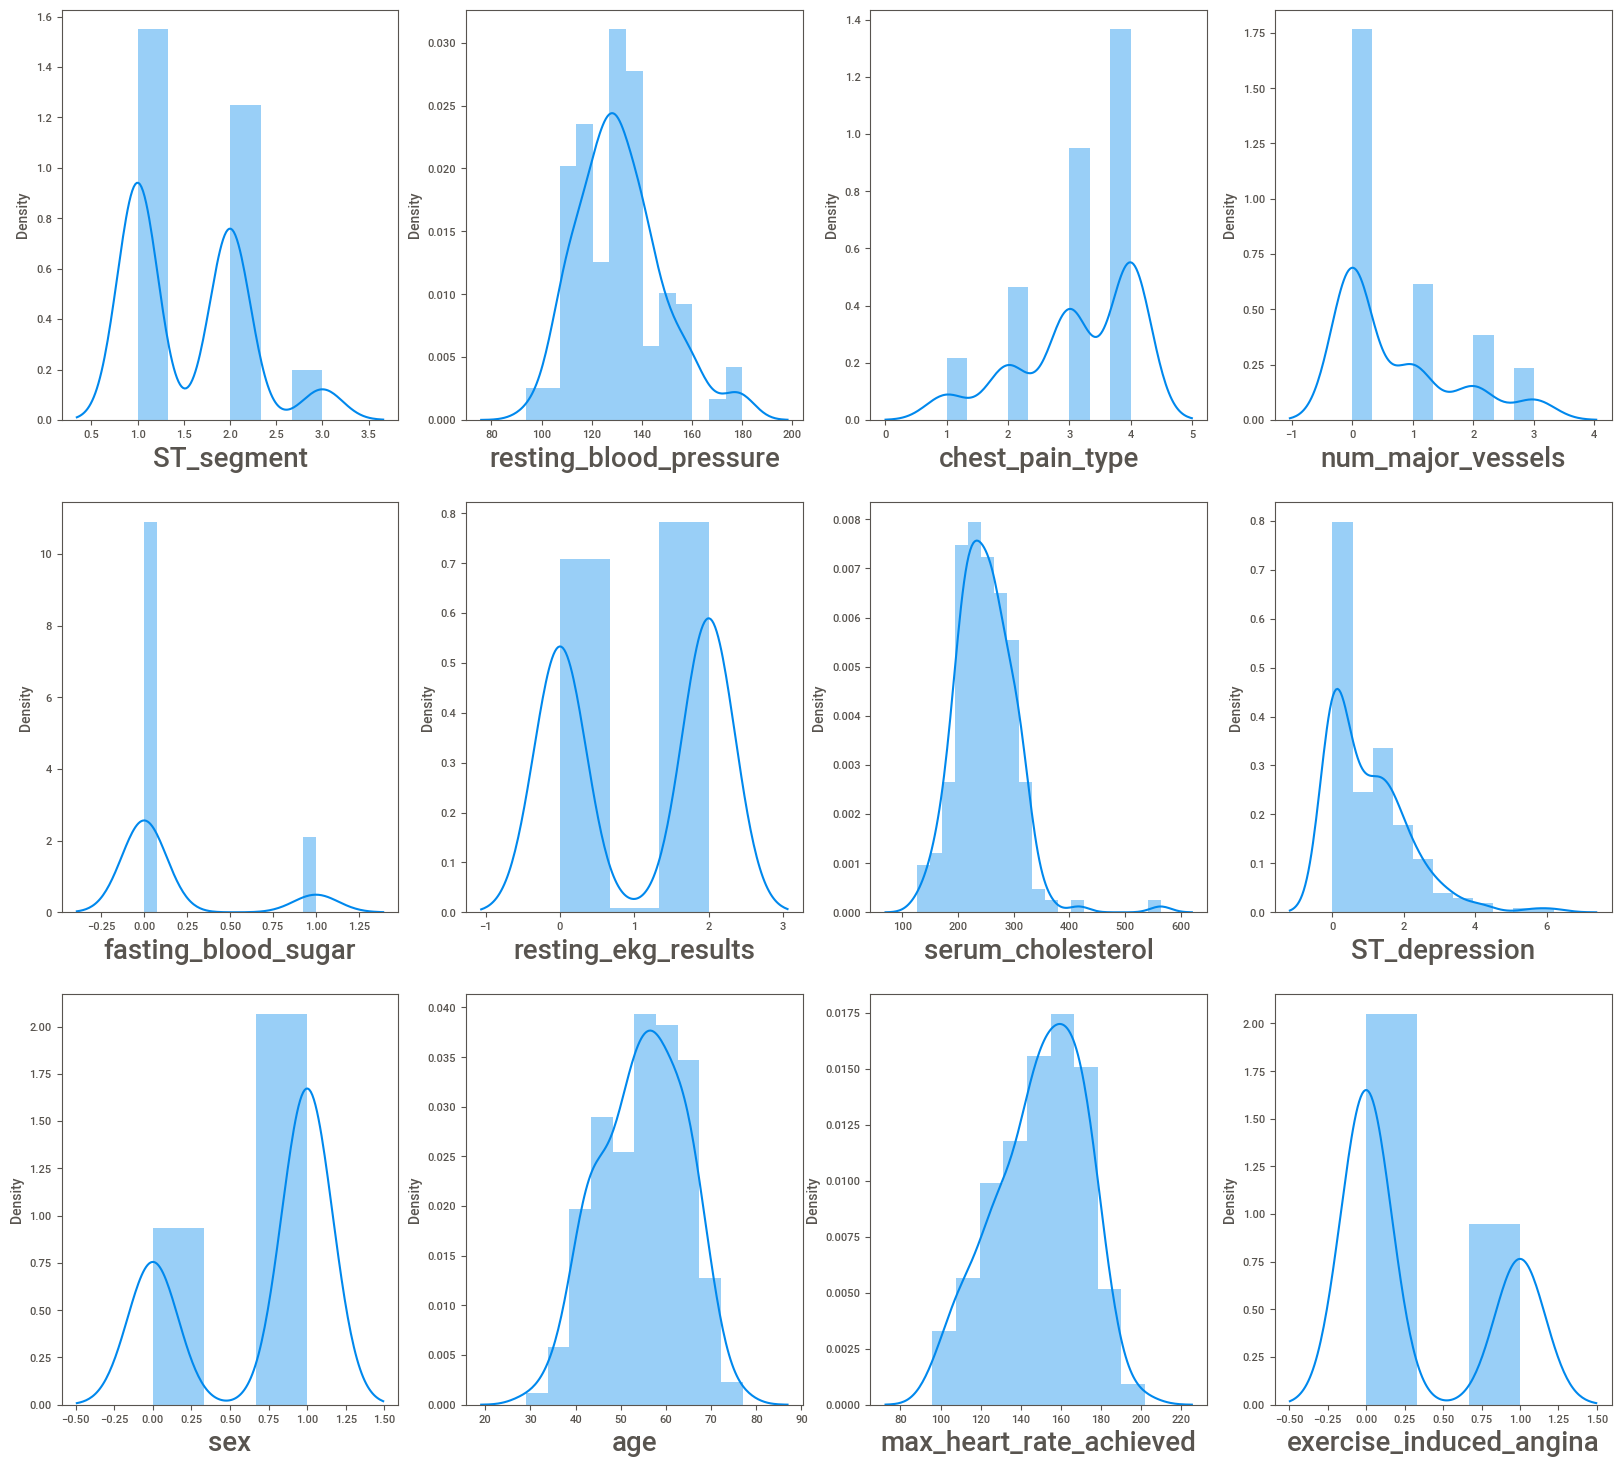

In [54]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data1[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

## Visualizing Outliers Using Boxplots

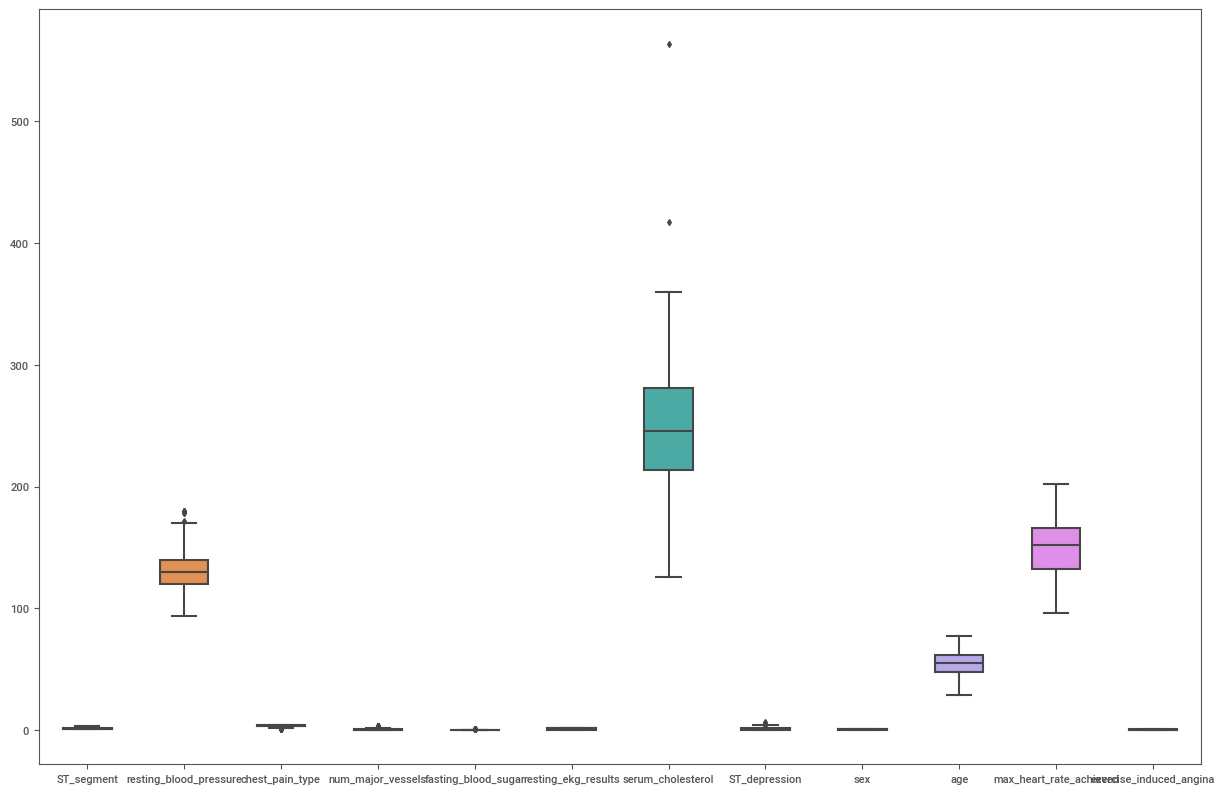

In [55]:
## checking the outliers for numeric features using boxplot
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data1, width= 0.5,ax=ax,fliersize=3)
plt.show()

#Observation: Needs outlier treatment # here visualization is difficult, so trying other way of plotting outliers.

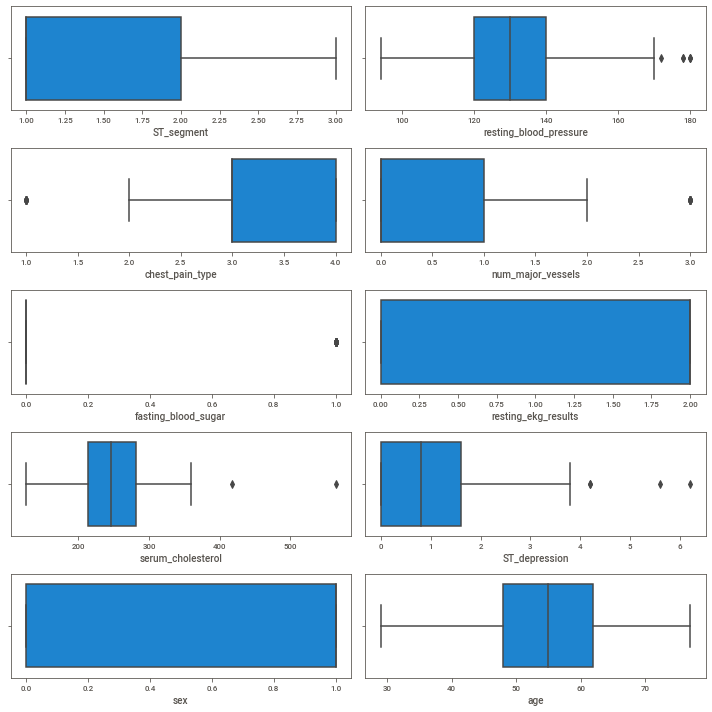

In [56]:
%matplotlib inline
plt.figure(figsize=(10,10), tight_layout=True)  
plotnumber=1
for column in data1:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber) 
        #plt.xlabel(column,fontsize = 5)   
        sns.boxplot(x=data1[column])
        plotnumber+=1

# Removing Outliers

In [57]:
# now separating features individually and removing outliers.

### Checking Outlier For The Feature "ST_segment"

<AxesSubplot:xlabel='ST_segment', ylabel='Density'>

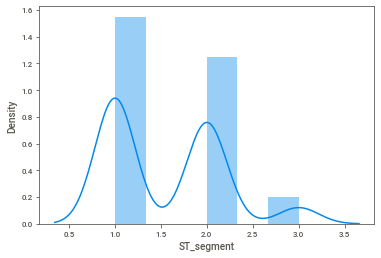

In [58]:
sns.distplot(data.ST_segment)


<AxesSubplot:xlabel='ST_segment'>

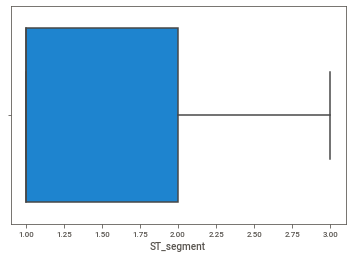

In [59]:
sns.boxplot(data.ST_segment) #no outlier present

In [60]:
data.columns

Index(['patient_id', 'ST_segment', 'thallium_stress', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels', 'fasting_blood_sugar',
       'resting_ekg_results', 'serum_cholesterol', 'ST_depression', 'sex',
       'age', 'max_heart_rate_achieved', 'exercise_induced_angina', 'Target'],
      dtype='object')

### Checking Outlier For The Feature "resting_blood_pressure"

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='Density'>

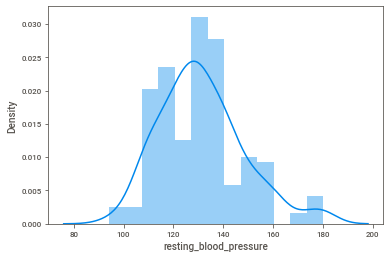

In [61]:
sns.distplot(data.resting_blood_pressure)

<AxesSubplot:xlabel='resting_blood_pressure'>

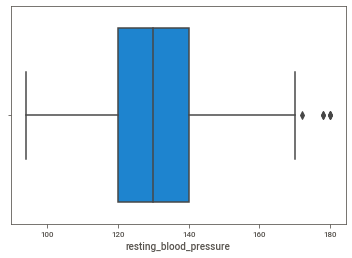

In [62]:
sns.boxplot(data.resting_blood_pressure) #Outlier treatment required 

### Removing Outlier For "resting_blood_pressure" Feature Using IQR

In [63]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(data['resting_blood_pressure'], interpolation = 'midpoint') 

IQR

20.0

In [64]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = data['resting_blood_pressure'].quantile(0.25)
# Third quartile (Q3) 
Q3 = data['resting_blood_pressure'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [65]:
min_limit

90.0

In [66]:
#filtering the data
data1.loc[data['resting_blood_pressure']<min_limit]

,ST_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar,resting_ekg_results,serum_cholesterol,ST_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina


In [67]:
max_limit

170.0

In [68]:
data.loc[data['resting_blood_pressure']>max_limit]

,patient_id,ST_segment,thallium_stress,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar,resting_ekg_results,serum_cholesterol,ST_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,Target
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
33,0n5fu0,1,normal,180,4,0,0,0,325,0.0,0,64,154,1,0
72,qwj1yf,1,reversible_defect,172,3,0,1,0,199,0.5,1,52,162,0,0
75,4v0q7o,2,reversible_defect,178,4,2,1,0,228,1.0,0,66,165,1,1
113,sqddbc,2,reversible_defect,180,3,0,1,2,274,1.6,1,68,150,1,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1


In [69]:
## imputing the outliers 
data.loc[data['resting_blood_pressure'] > max_limit,'resting_blood_pressure']=np.median(data['resting_blood_pressure'])

<AxesSubplot:xlabel='resting_blood_pressure'>

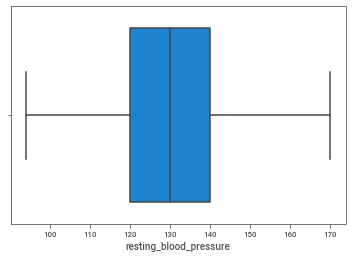

In [70]:
# Checking for outliers again using boxplot

sns.boxplot(data.resting_blood_pressure)
#Insight: Outlier has been removed for the "resting_blood_pressure" feature

### Checking Outlier For The Feature "chest_pain_type"

<AxesSubplot:xlabel='chest_pain_type', ylabel='Density'>

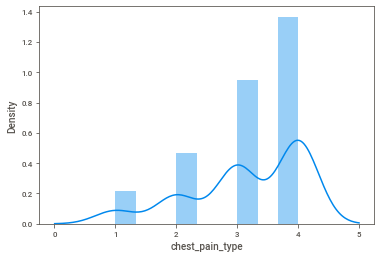

In [71]:
sns.distplot(data.chest_pain_type)

<AxesSubplot:xlabel='chest_pain_type'>

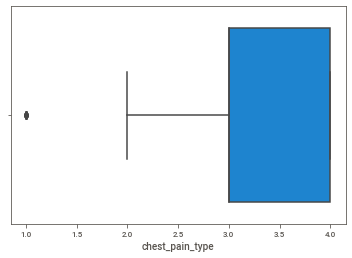

In [72]:
sns.boxplot(data.chest_pain_type)#Outlier treatment required 

### Removing Outlier For "chest_pain_type" Feature Using IQR

In [73]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(data['chest_pain_type'], interpolation = 'midpoint') 

IQR

1.0

In [74]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = data['chest_pain_type'].quantile(0.25)
# Third quartile (Q3) 
Q3 = data['chest_pain_type'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [75]:
min_limit

1.5

In [76]:
#filtering the data
data.loc[data['chest_pain_type']<min_limit]

,patient_id,ST_segment,thallium_stress,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar,resting_ekg_results,serum_cholesterol,ST_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,Target
4,oyt4ek,3,reversible_defect,130.0,1,0,0,2,270,4.2,1,59,145,0,0
14,f06u72,2,reversible_defect,120.0,1,0,0,0,231,3.8,1,38,182,1,1
97,z5g5p3,2,normal,160.0,1,1,1,2,234,0.1,1,69,131,0,0
99,bthqr4,1,normal,150.0,1,0,1,2,283,1.0,0,58,162,0,0
108,e68djo,1,normal,125.0,1,1,0,2,213,1.4,1,51,125,1,0
120,ju1wdc,2,normal,138.0,1,1,1,2,282,1.4,1,65,174,0,1
141,471q03,2,reversible_defect,120.0,1,0,0,2,193,1.9,1,56,162,0,0
146,z8yl4y,1,reversible_defect,140.0,1,0,0,0,199,1.4,1,40,178,1,0
147,mxabaz,2,normal,134.0,1,2,0,0,234,2.6,1,61,145,0,1
155,fz84ac,1,normal,160.0,1,0,0,2,273,0.0,1,59,125,0,1


In [77]:
# the count is more than 5% (ie 9) so no need to treat the outlier

In [78]:
## imputing the outliers 
#data.loc[data['chest_pain_type'] < min_limit,'chest_pain_type']=np.median(data['chest_pain_type'])

In [79]:
max_limit

5.5

In [80]:
data.loc[data['chest_pain_type']>max_limit]

,patient_id,ST_segment,thallium_stress,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar,resting_ekg_results,serum_cholesterol,ST_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,Target


### Checking Outlier For The Feature "num_major_vessels"

<AxesSubplot:xlabel='num_major_vessels', ylabel='Density'>

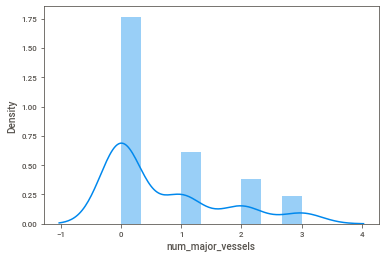

In [81]:
sns.distplot(data.num_major_vessels)

<AxesSubplot:xlabel='num_major_vessels'>

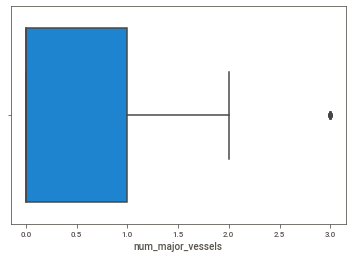

In [82]:
sns.boxplot(data.num_major_vessels)

#Outlier treatment required 

### Removing Outlier For "num_major_vessels" Feature Using IQR

In [83]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(data['num_major_vessels'], interpolation = 'midpoint') 

IQR

1.0

In [84]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = data['num_major_vessels'].quantile(0.25)
# Third quartile (Q3) 
Q3 = data['num_major_vessels'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [85]:
min_limit

-1.5

In [86]:
#filtering the data
data.loc[data['num_major_vessels']<min_limit]

,patient_id,ST_segment,thallium_stress,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar,resting_ekg_results,serum_cholesterol,ST_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,Target


In [87]:
max_limit

2.5

In [88]:
data.loc[data['num_major_vessels']>max_limit]

,patient_id,ST_segment,thallium_stress,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar,resting_ekg_results,serum_cholesterol,ST_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,Target
2,yt1s1x,1,normal,125.0,4,3,0,2,304,0.0,1,77,162,1,1
21,k8899q,1,reversible_defect,108.0,4,3,1,0,233,0.1,1,52,147,0,0
31,z7xkou,2,reversible_defect,150.0,4,3,0,2,225,1.0,0,65,114,0,1
52,r7y4i1,1,reversible_defect,130.0,4,3,1,2,330,1.8,1,63,132,1,1
66,m6zksp,2,normal,130.0,4,3,0,2,322,2.4,1,70,109,0,1
69,mcwqgs,2,reversible_defect,120.0,3,3,0,0,188,2.0,1,49,139,0,1
85,hfp05i,1,normal,118.0,3,3,0,2,149,0.8,1,49,126,0,1
112,6r9x2j,2,reversible_defect,140.0,4,3,0,0,298,4.2,1,51,122,1,1
119,1jruhz,2,normal,138.0,4,3,1,0,294,1.9,0,62,106,0,1
123,6jcc1y,1,normal,130.0,3,3,1,2,246,0.0,1,53,173,0,0


In [89]:
#data1.loc[data['num_major_vessels'] > max_limit,'num_major_vessels']=np.median(data['num_major_vessels'])

In [90]:
# the count is more than 5% (ie 9) so no need to treat the outlier

### Checking Outlier For The Feature "fasting_blood_sugar"

<AxesSubplot:xlabel='fasting_blood_sugar', ylabel='Density'>

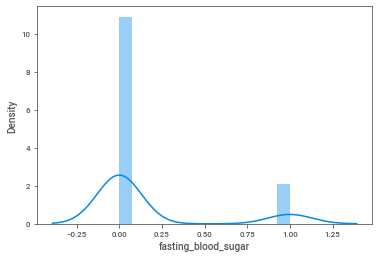

In [91]:
sns.distplot(data.fasting_blood_sugar)

<AxesSubplot:xlabel='fasting_blood_sugar'>

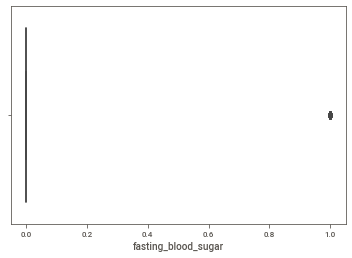

In [92]:
sns.boxplot(data.fasting_blood_sugar)

#Outlier treatment required 

### Removing Outlier For "fasting_blood_sugar" Feature Using IQR

In [93]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(data['fasting_blood_sugar'], interpolation = 'midpoint') 

IQR

0.0

In [94]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = data['fasting_blood_sugar'].quantile(0.25)
# Third quartile (Q3) 
Q3 = data['fasting_blood_sugar'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [95]:
min_limit

0.0

In [96]:
#filtering the data
data.loc[data['fasting_blood_sugar']<min_limit]

,patient_id,ST_segment,thallium_stress,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar,resting_ekg_results,serum_cholesterol,ST_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,Target


In [97]:
max_limit

0.0

In [98]:
data.loc[data['fasting_blood_sugar']>max_limit]

,patient_id,ST_segment,thallium_stress,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar,resting_ekg_results,serum_cholesterol,ST_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,Target
19,30v796,1,normal,136.0,2,2,1,2,319,0.0,0,58,152,0,1
21,k8899q,1,reversible_defect,108.0,4,3,1,0,233,0.1,1,52,147,0,0
27,f4g1ay,1,normal,128.0,2,0,1,0,205,0.0,1,52,184,0,0
32,k7ef7h,3,reversible_defect,140.0,4,0,1,2,203,3.1,1,53,155,1,1
36,xkdz7j,1,reversible_defect,150.0,3,1,1,0,126,0.2,1,57,173,0,0
40,ty4ik8,2,normal,150.0,3,0,1,0,243,1.0,1,61,137,1,0
42,hlmts5,1,normal,110.0,3,1,1,2,265,0.0,0,71,130,0,0
43,yx0q6k,1,normal,140.0,3,1,1,2,417,0.8,0,65,157,0,0
46,6219kl,2,normal,125.0,3,0,1,2,245,2.4,1,51,166,0,0
52,r7y4i1,1,reversible_defect,130.0,4,3,1,2,330,1.8,1,63,132,1,1


In [99]:
# the count is more than 5% (ie 9) so no need to treat the outlier

### Checking Outlier For The Feature "resting_ekg_results"

<AxesSubplot:xlabel='resting_ekg_results', ylabel='Density'>

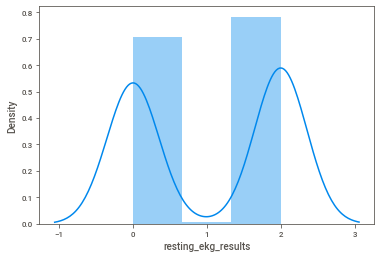

In [100]:
sns.distplot(data.resting_ekg_results)

<AxesSubplot:xlabel='resting_ekg_results'>

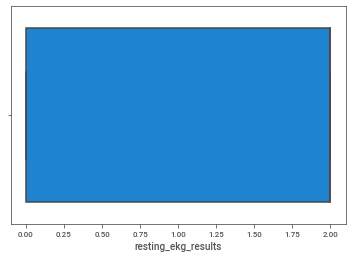

In [101]:
sns.boxplot(data.resting_ekg_results)

#Outlier is not present

### Checking Outlier For The Feature "serum_cholesterol"

<AxesSubplot:xlabel='serum_cholesterol', ylabel='Density'>

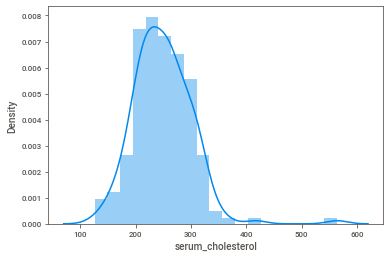

In [102]:
sns.distplot(data.serum_cholesterol)

<AxesSubplot:xlabel='serum_cholesterol'>

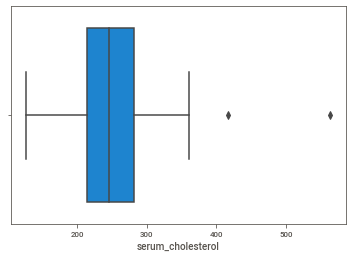

In [103]:
sns.boxplot(data.serum_cholesterol)

#Outlier treatment required 

### Removing Outlier For "serum_cholesterol" Feature Using IQR

In [104]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(data['serum_cholesterol'], interpolation = 'midpoint') 

IQR

68.0

In [105]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = data['serum_cholesterol'].quantile(0.25)
# Third quartile (Q3) 
Q3 = data['serum_cholesterol'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [106]:
min_limit

111.75

In [107]:
#filtering the data
data.loc[data['serum_cholesterol']<min_limit]

,patient_id,ST_segment,thallium_stress,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar,resting_ekg_results,serum_cholesterol,ST_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,Target


In [108]:
max_limit

383.25

In [109]:
data.loc[data['serum_cholesterol']>max_limit]

,patient_id,ST_segment,thallium_stress,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar,resting_ekg_results,serum_cholesterol,ST_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,Target
43,yx0q6k,1,normal,140.0,3,1,1,2,417,0.8,0,65,157,0,0
60,rv6siv,2,reversible_defect,115.0,3,0,0,2,564,1.6,0,67,160,0,0


In [110]:
## imputing the outliers
data.loc[data['serum_cholesterol'] > max_limit,'serum_cholesterol']=np.median(data['serum_cholesterol'])

<AxesSubplot:xlabel='serum_cholesterol'>

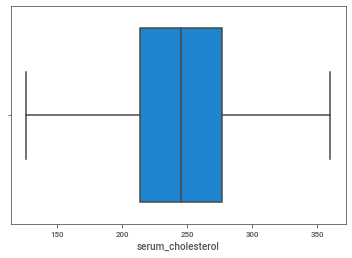

In [111]:
# Checking for outliers again using boxplot

sns.boxplot(data.serum_cholesterol)
#Insight: Outlier has been removed for the "serum_cholesterol" feature

### Checking Outlier For The Feature "ST_depression"

<AxesSubplot:xlabel='ST_depression', ylabel='Density'>

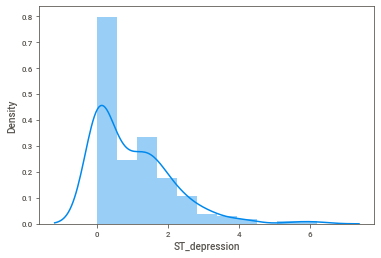

In [112]:
sns.distplot(data.ST_depression)

<AxesSubplot:xlabel='ST_depression'>

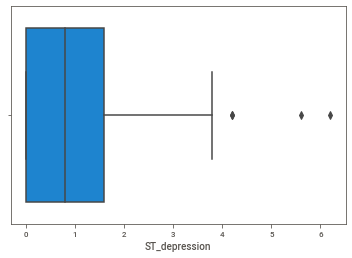

In [113]:
sns.boxplot(data.ST_depression)

### Removing Outlier For "ST_depression" Feature Using IQR

In [114]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(data['ST_depression'], interpolation = 'midpoint') 

IQR

1.6

In [115]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = data['ST_depression'].quantile(0.25)
# Third quartile (Q3) 
Q3 = data['ST_depression'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [116]:
min_limit

-2.4000000000000004

In [117]:
#filtering the data
data.loc[data['ST_depression']<min_limit]

,patient_id,ST_segment,thallium_stress,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar,resting_ekg_results,serum_cholesterol,ST_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,Target


In [118]:
max_limit

4.0

In [119]:
data.loc[data['ST_depression']>max_limit]

,patient_id,ST_segment,thallium_stress,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar,resting_ekg_results,serum_cholesterol,ST_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,Target
4,oyt4ek,3,reversible_defect,130.0,1,0,0,2,270.0,4.2,1,59,145,0,0
112,6r9x2j,2,reversible_defect,140.0,4,3,0,0,298.0,4.2,1,51,122,1,1
140,noxsnw,3,reversible_defect,140.0,4,0,0,0,217.0,5.6,1,55,111,1,1
162,usnkhx,3,reversible_defect,160.0,4,3,0,2,164.0,6.2,0,62,145,0,1


In [120]:
## imputing the outliers
data.loc[data['ST_depression'] > max_limit,'ST_depression']=np.median(data['ST_depression'])

<AxesSubplot:xlabel='ST_depression'>

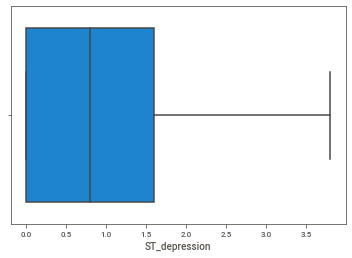

In [121]:
# Checking for outliers again using boxplot

sns.boxplot(data.ST_depression)
#Insight: Outlier has been removed for the "ST_depression" feature

### Checking Outlier For The Feature "sex"

<AxesSubplot:xlabel='sex', ylabel='Density'>

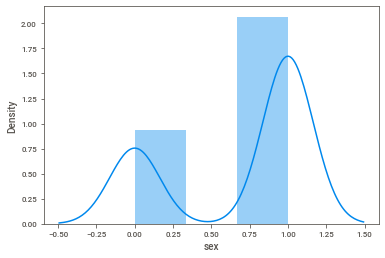

In [122]:
sns.distplot(data.sex)

<AxesSubplot:xlabel='sex'>

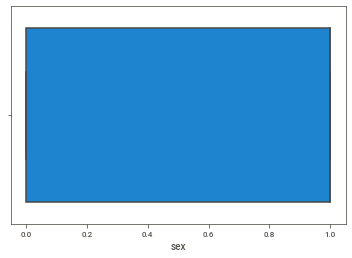

In [123]:
sns.boxplot(data.sex)

#No Outlier treatment required 

### Checking Outlier For The Feature "age"

<AxesSubplot:xlabel='age', ylabel='Density'>

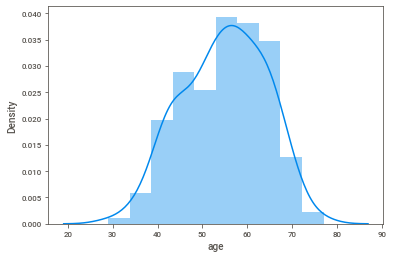

In [124]:
sns.distplot(data.age)

<AxesSubplot:xlabel='age'>

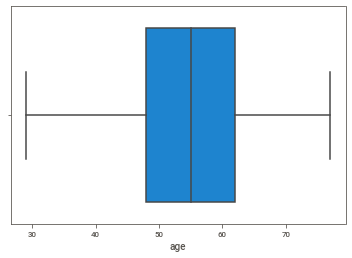

In [125]:
sns.boxplot(data.age)

#No Outlier treatment required 

## Conversion of categorical features to numerical - Label Encoding

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   patient_id               180 non-null    object 
 1   ST_segment               180 non-null    int64  
 2   thallium_stress          180 non-null    object 
 3   resting_blood_pressure   180 non-null    float64
 4   chest_pain_type          180 non-null    int64  
 5   num_major_vessels        180 non-null    int64  
 6   fasting_blood_sugar      180 non-null    int64  
 7   resting_ekg_results      180 non-null    int64  
 8   serum_cholesterol        180 non-null    float64
 9   ST_depression            180 non-null    float64
 10  sex                      180 non-null    int64  
 11  age                      180 non-null    int64  
 12  max_heart_rate_achieved  180 non-null    int64  
 13  exercise_induced_angina  180 non-null    int64  
 14  Target                   1

In [127]:
data.thallium_stress.unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [128]:
## Conversion of categorical data to numeric equivalent for the feature "thallium_stress" - Manual encoding 
#data.thallium_stress= data.thallium_stress.map({'normal':1,'reversible_defect':2,'fixed_defect':3})

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data.thallium_stress= label_encoder.fit_transform(data.thallium_stress)



In [129]:
#one_hot_encode_thallium = pd.get_dummies(data, columns = ['thallium_stress'])
#data1 = one_hot_encode_thallium

In [130]:
#data

In [131]:
#data1 = data1.drop('thallium_stress_fixed_defect',axis = 1)

In [132]:
#data1

In [133]:
#v=data1[list(data1.columns)[-1]] #get the values of the last column

In [134]:
#data1=data1.drop(['thallium_stress_reversible_defect'],axis=1)  #drop the column

In [135]:
#data1.insert(0,'thallium_stress_reversible_defect1',v) #insert as the first column
#v=data1[list(data1.columns)[-1]] #get the values of the last column

In [136]:
#data1=data1.drop(['thallium_stress_normal'],axis=1)  #drop the column

In [137]:
#data1.insert(0,'thallium_stress_normal',v) #insert as the first column

In [138]:
#data1=data1.drop(['thallium_stress_reversible_defect'],axis=1)  #drop the column

In [139]:
#data1  #.iloc[ : , 0: -2]

In [140]:
#data=data1

### we also tried one-hot encoding with the 'thallium_stress' feature which gives bad result so we keep label encoding.

In [141]:
data.head()

,patient_id,ST_segment,thallium_stress,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar,resting_ekg_results,serum_cholesterol,ST_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,Target
0,0z64un,1,1,128.0,2,0,0,2,308.0,0.0,1,45,170,0,0
1,ryoo3j,2,1,110.0,3,0,0,0,214.0,1.6,0,54,158,0,0
2,yt1s1x,1,1,125.0,4,3,0,2,304.0,0.0,1,77,162,1,1
3,l2xjde,1,2,152.0,4,0,0,0,223.0,0.0,1,40,181,0,1
4,oyt4ek,3,2,130.0,1,0,0,2,270.0,0.8,1,59,145,0,0


In [142]:
data.drop(columns=['patient_id'], axis=1, inplace=True)

In [143]:
data

,ST_segment,thallium_stress,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar,resting_ekg_results,serum_cholesterol,ST_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,Target
0,1,1,128.0,2,0,0,2,308.0,0.0,1,45,170,0,0
1,2,1,110.0,3,0,0,0,214.0,1.6,0,54,158,0,0
2,1,1,125.0,4,3,0,2,304.0,0.0,1,77,162,1,1
3,1,2,152.0,4,0,0,0,223.0,0.0,1,40,181,0,1
4,3,2,130.0,1,0,0,2,270.0,0.8,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,2,125.0,4,2,1,0,254.0,0.2,1,67,163,0,1
176,2,1,130.0,4,0,0,1,327.0,3.4,0,55,117,1,1
177,2,2,125.0,3,0,0,0,309.0,1.8,1,64,131,1,1
178,1,1,124.0,3,2,1,0,255.0,0.0,1,48,175,0,0


## Feature Selection

<AxesSubplot:>

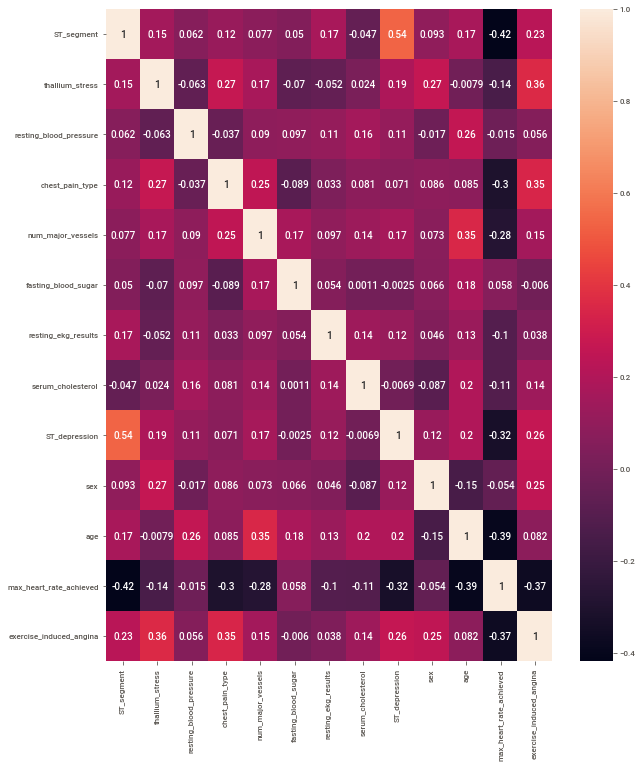

In [144]:
plt.figure(figsize=(10,12))
sns.heatmap(data.drop('Target',axis=1).corr(),annot=True)
## NO correlated features are present

In [145]:
data.describe()

,ST_segment,thallium_stress,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar,resting_ekg_results,serum_cholesterol,ST_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,Target
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,1.366667,129.711111,3.155556,0.694444,0.161111,1.050000,246.488889,0.915556,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,0.568247,14.611731,0.938454,0.969347,0.368659,0.998742,45.398452,0.931439,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,0.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.250000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,277.000000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,2.000000,170.000000,4.000000,3.000000,1.000000,2.000000,360.000000,3.800000,1.000000,77.000000,202.000000,1.000000,1.000000


## Model Creation

In [146]:
## Defining the threshold limit
def predict_threshold (model,X_test,thresholds):
    return np.where(model.predict_proba(X_test)[:,1]>thresholds,1,0)

In [147]:
## draw the roc plot
def plot_roc_curve(mfpr, mtpr):
    plt.plot(mfpr, mtpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC/AUC Curve')
    plt.legend()
    plt.show()

In [148]:
df.head()

,ST_segment,thallium_stress,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar,resting_ekg_results,serum_cholesterol,ST_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,Target
0,1,1,128.0,2,0,0,2,308.0,0.0,1,45,170,0,0
1,2,1,110.0,3,0,0,0,214.0,1.6,0,54,158,0,0
2,1,1,125.0,4,3,0,2,304.0,0.0,1,77,162,1,1
3,1,2,152.0,4,0,0,0,223.0,0.0,1,40,181,0,1
4,3,2,130.0,1,0,0,2,270.0,0.8,1,59,145,0,0


In [149]:
# check if there is any imbalance with response variable.
df.groupby('Target').size()

# Since we have imbalanced data, we may have to sub-sample the data /over sample/ create synthetic data using SMOTE()
# we will try using first with SMOTE() and check the accuracy scores with different models going to be built now.

Target
0    100
1     80
dtype: int64

In [150]:
# define data
X = data.iloc[ : , 0:-1 ]
y = data['Target']
rl = []
rl_roc=[]

In [151]:
# Scale the data
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [152]:
## SMOTE() the data
from imblearn.over_sampling import SMOTE
smote = SMOTE() # create object smote

In [153]:
X_smote, y_smote = smote.fit_resample(X,y)

In [154]:
X_smote

,ST_segment,thallium_stress,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar,resting_ekg_results,serum_cholesterol,ST_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,1,128.000000,2,0,0,2,308.000000,0.000000,1,45,170,0
1,2,1,110.000000,3,0,0,0,214.000000,1.600000,0,54,158,0
2,1,1,125.000000,4,3,0,2,304.000000,0.000000,1,77,162,1
3,1,2,152.000000,4,0,0,0,223.000000,0.000000,1,40,181,0
4,3,2,130.000000,1,0,0,2,270.000000,0.800000,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2,2,123.787290,2,0,0,2,281.757458,1.475746,1,59,103,0
196,1,1,135.860409,3,0,0,0,344.314080,0.620939,1,59,144,0
197,1,1,142.675678,4,0,0,0,247.295945,1.400000,0,61,150,1
198,1,2,125.261544,2,0,0,0,259.528198,0.531283,1,58,142,0


In [155]:
# split data into train and test
from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state = 42)
X_train,X_test,y_train,y_test=train_test_split(X_smote, y_smote, test_size=0.20, random_state=42)

#### Logistic Regression

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score, \
classification_report,roc_auc_score, roc_curve
log_reg = LogisticRegression()

In [157]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [158]:
y_hat = log_reg.predict(X_test)

In [159]:
# F1 Score
F1_Score = f1_score(y_test,y_hat)
F1_Score

0.8108108108108109

In [160]:
# accuracy
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.825

In [161]:
# Precison
Precision = precision_score(y_test,y_hat)
Precision

0.8333333333333334

In [162]:
# Recall
Recall = recall_score(y_test,y_hat)
Recall

0.7894736842105263

In [163]:
#AUC
auc = roc_auc_score(y_test, y_hat)
auc

0.8233082706766918

In [164]:
pd.crosstab(y_test, y_hat)

col_0,0,1
Target,,
0,18,3
1,4,15


In [165]:
rep=classification_report(y_test, y_hat)
print(rep)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        21
           1       0.83      0.79      0.81        19

    accuracy                           0.82        40
   macro avg       0.83      0.82      0.82        40
weighted avg       0.83      0.82      0.82        40



In [166]:
## Prediciting the probabilities of class 1
probs=log_reg.predict_proba(X_test)[:,1]
probs

array([0.69502687, 0.94016801, 0.4279814 , 0.09210483, 0.90843041,
       0.12195284, 0.95550689, 0.98254761, 0.4117993 , 0.42681664,
       0.99370467, 0.84933645, 0.05688962, 0.99459989, 0.91770816,
       0.89647306, 0.98397987, 0.93831808, 0.14497204, 0.09686474,
       0.9932325 , 0.03485398, 0.16154653, 0.90810717, 0.88472961,
       0.32042399, 0.21341014, 0.25232266, 0.36757645, 0.09548253,
       0.1004396 , 0.03704414, 0.14462476, 0.56083938, 0.29043023,
       0.46978923, 0.53607563, 0.26907968, 0.95896571, 0.03587926])

In [167]:
import numpy as np
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1.0,0.1):
    y_predict = predict_threshold(log_reg,X_test,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_test,y_hat))

Threshold : 0.0
[[18  3]
 [ 4 15]]
Threshold : 0.1
[[18  3]
 [ 4 15]]
Threshold : 0.2
[[18  3]
 [ 4 15]]
Threshold : 0.30000000000000004
[[18  3]
 [ 4 15]]
Threshold : 0.4
[[18  3]
 [ 4 15]]
Threshold : 0.5
[[18  3]
 [ 4 15]]
Threshold : 0.6000000000000001
[[18  3]
 [ 4 15]]
Threshold : 0.7000000000000001
[[18  3]
 [ 4 15]]
Threshold : 0.8
[[18  3]
 [ 4 15]]
Threshold : 0.9
[[18  3]
 [ 4 15]]


In [168]:
#from sklearn.metrics import roc_auc_score,roc_curve ## used to compare multiple models
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.88


In [169]:
rl.append(['LR',F1_Score, accuracy, Precision, Recall, auc])
#print('f1',F1_Score, 'accuracy',accuracy,'precision',Precision,'recall',Recall,'auc',auc)

In [170]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
rl_roc.append(['LR',fpr,tpr,thresholds])

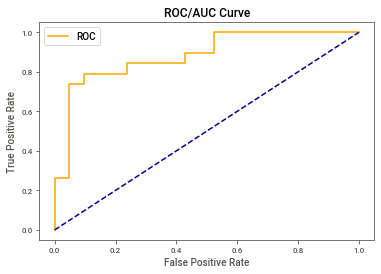

In [171]:
#Receiver operating characterstic (ROC) Curve / Area under the ROC (AUC) Curve
import matplotlib.pyplot as plt
plot_roc_curve(fpr, tpr)

#### SVM

In [172]:
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_train, y_train)

SVC()

In [173]:
## henceforth all output from predict will be assigned to y_hat in all classifiers for easy understanding of code.
y_hat=svclassifier.predict(X_test)

In [174]:
## evaluating the model created
from sklearn.metrics import accuracy_score,classification_report,f1_score
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(svclassifier, X_scaled, y, scoring='accuracy', cv = 3)
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

Accuracy of Model with Cross Validation is: 83.33333333333334


In [175]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71        21
           1       0.69      0.58      0.63        19

    accuracy                           0.68        40
   macro avg       0.68      0.67      0.67        40
weighted avg       0.68      0.68      0.67        40



In [176]:
F1_Score=f1_score(y_test,y_hat)
F1_Score

0.6285714285714286

In [177]:
## cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svclassifier,X,y,cv=4,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.37037037 0.26086957 0.4        0.26086957]
Cross validation Score: 0.32302737520128827
Std : 0.0630343772158722


In [178]:
# implmenting GridsearchCV
from sklearn.model_selection import GridSearchCV
  
# fixing parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 
  
grid = GridSearchCV(SVC(random_state=42), param_grid, refit = True, verbose = 3,scoring='f1',cv=3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END ....................C=0.1, gamma=1;, score=0.667 total time=   0.0s
[CV 2/3] END ....................C=0.1, gamma=1;, score=0.675 total time=   0.0s
[CV 3/3] END ....................C=0.1, gamma=1;, score=0.675 total time=   0.0s
[CV 1/3] END ..................C=0.1, gamma=0.1;, score=0.667 total time=   0.0s
[CV 2/3] END ..................C=0.1, gamma=0.1;, score=0.675 total time=   0.0s
[CV 3/3] END ..................C=0.1, gamma=0.1;, score=0.675 total time=   0.0s
[CV 1/3] END .................C=0.1, gamma=0.01;, score=0.667 total time=   0.0s
[CV 2/3] END .................C=0.1, gamma=0.01;, score=0.675 total time=   0.0s
[CV 3/3] END .................C=0.1, gamma=0.01;, score=0.675 total time=   0.0s
[CV 1/3] END ................C=0.1, gamma=0.001;, score=0.667 total time=   0.0s
[CV 2/3] END ................C=0.1, gamma=0.001;, score=0.693 total time=   0.0s
[CV 3/3] END ................C=0.1, gamma=0.001;

GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=3)

In [179]:
# best parameter from GridSearchCV
print(grid.best_params_)

{'C': 1000, 'gamma': 0.0001}


In [180]:
# check best estimator 
print(grid.best_estimator_)

SVC(C=1000, gamma=0.0001, random_state=42)


In [181]:
# supplying above SVC & gamma values got from the GridSearchCV to the classifier (SVC)  
clf=SVC(C=1000, gamma=0.0001, random_state=42)

In [182]:
# fit the data with classifier
clf.fit(X_train,y_train)

SVC(C=1000, gamma=0.0001, random_state=42)

In [183]:
# prediction after GridSearch
y_hat=clf.predict(X_test)

In [184]:
#confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix

array([[13,  8],
       [ 4, 15]], dtype=int64)

In [185]:
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.7

In [186]:
Precision = precision_score(y_test,y_hat)
Precision

0.6521739130434783

In [187]:
Recall = recall_score(y_test,y_hat)
Recall

0.7894736842105263

In [188]:
F1_Score=f1_score(y_test,y_hat)
F1_Score

0.7142857142857143

In [189]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.76      0.62      0.68        21
           1       0.65      0.79      0.71        19

    accuracy                           0.70        40
   macro avg       0.71      0.70      0.70        40
weighted avg       0.71      0.70      0.70        40



In [190]:
auc = roc_auc_score(y_test, y_hat)
print('AUC: %.2f' % auc)

AUC: 0.70


In [191]:
rl.append(['SVM',F1_Score, accuracy, Precision, Recall, auc])
#print('SVM---->f1',F1_Score, 'accuracy',accuracy,'precision',Precision,'recall',Recall,'auc',auc)

In [192]:
scores_after = cross_val_score(clf,X_scaled,y,cv=3,scoring='f1')
print(scores_after)
print("Cross validation Score:",scores_after.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.80851064 0.76363636 0.83636364]
Cross validation Score: 0.8028368794326242
Std : 0.0630343772158722


In [193]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
rl_roc.append(['SVM',fpr,tpr,thresholds])

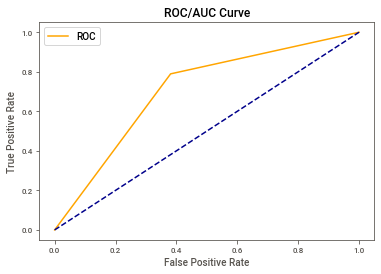

In [194]:
#import matplotlib.pyplot as plt
plot_roc_curve(fpr,tpr)

#### KNN

In [195]:
from sklearn.neighbors import KNeighborsClassifier

In [196]:
## taking optimal k (k = 10)
error_rate = []
# Will try
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

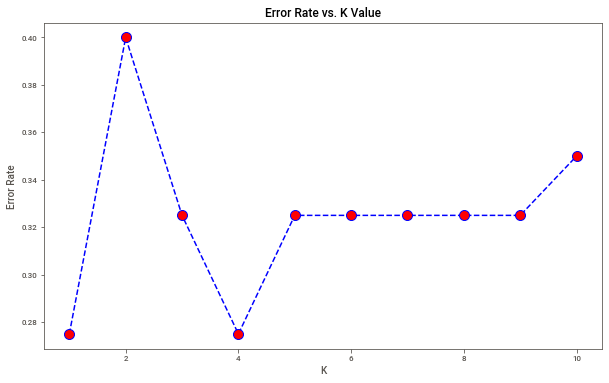

In [197]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [198]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [199]:
# Prediction
y_hat = knn.predict(X_test)

In [200]:
#confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix

array([[17,  4],
       [ 7, 12]], dtype=int64)

In [201]:
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.725

In [202]:
Precision = precision_score(y_test,y_hat)
Precision

0.75

In [203]:
Recall = recall_score(y_test,y_hat)
Recall

0.631578947368421

In [204]:
# F1 Score
F1_Score = f1_score(y_test,y_hat)
F1_Score

0.6857142857142857

In [205]:
print("The accuracy score is : ", accuracy_score(y_test,y_hat))

The accuracy score is :  0.725


In [206]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76        21
           1       0.75      0.63      0.69        19

    accuracy                           0.73        40
   macro avg       0.73      0.72      0.72        40
weighted avg       0.73      0.72      0.72        40



In [207]:
auc = roc_auc_score(y_test, y_hat)
print('AUC: %.2f' % auc)

AUC: 0.72


In [208]:
rl.append(['KNN',F1_Score, accuracy, Precision, Recall, auc])
#print('KNN---->f1',F1_Score, 'accuracy',accuracy,'precision',Precision,'recall',Recall,'auc',auc)

In [209]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
rl_roc.append(['KNN',fpr,tpr,thresholds])

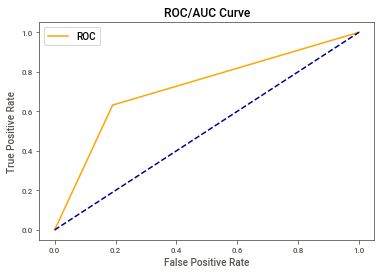

In [210]:
plt.figure(0).clf()
plot_roc_curve(fpr, tpr)

#### Naive Bays

In [211]:
# BernoulliNB
from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB(alpha=0.01) # object creation
nb.fit(X_train,y_train)

BernoulliNB(alpha=0.01)

In [212]:
y_hat=nb.predict(X_test)

In [213]:
from sklearn.metrics import classification_report,confusion_matrix

In [214]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        21
           1       0.79      0.79      0.79        19

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.80      0.80      0.80        40



In [215]:
pd.crosstab(y_test,y_hat)

col_0,0,1
Target,,
0,17,4
1,4,15


In [216]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix

array([[17,  4],
       [ 4, 15]], dtype=int64)

In [217]:
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.8

In [218]:
Precision = precision_score(y_test,y_hat)
Precision


0.7894736842105263

In [219]:
Recall = recall_score(y_test,y_hat)
Recall

0.7894736842105263

In [220]:
F1_Score=f1_score(y_test,y_hat)
F1_Score

0.7894736842105263

In [221]:
auc = roc_auc_score(y_test, y_hat)
print('AUC: %.2f' % auc)

AUC: 0.80


In [222]:
rl.append(['Naive bays',F1_Score, accuracy, Precision, Recall, auc])

In [223]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
rl_roc.append(['NB',fpr,tpr,thresholds])

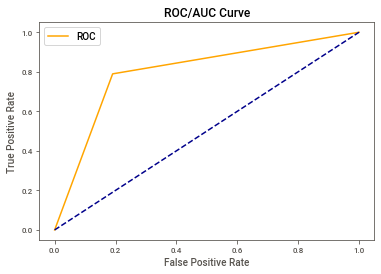

In [224]:
plt.figure(0).clf()
plot_roc_curve(fpr, tpr)

#### Decision Tree

In [225]:
#  decisiontree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [226]:
y_hat=dt.predict(X_test)

In [227]:
#from sklearn.metrics import accuracy_score,classification_report,f1_score
#confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix


array([[16,  5],
       [ 3, 16]], dtype=int64)

In [228]:
## calculating accuracy
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.8

In [229]:

# Precison - among all the positive predictions, how many of them actually positive
# = TP/(TP+FP)
Precision = precision_score(y_test,y_hat)
Precision

0.7619047619047619

In [230]:
# Recall - from the total positive results , how many positives are correctly predicted by the model
#= TP/(TP+FN)
Recall = recall_score(y_test,y_hat)
Recall

0.8421052631578947

In [231]:
F1_Score=f1_score(y_test, y_hat)

In [232]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        21
           1       0.76      0.84      0.80        19

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.80      0.80      0.80        40



In [233]:
from sklearn.model_selection import GridSearchCV

In [234]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}

tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train,y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'random'})


In [235]:
tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'splitter': 'random'}

In [236]:
tree_cv.best_score_

0.7996201329534663

In [237]:
# replace with the above best parameters on the Decicison Tree Classifier

dt_clf=DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_leaf=1,min_samples_split=4,splitter='random')

In [238]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=4, splitter='random')

In [239]:
y_hat=dt_clf.predict(X_test)

In [240]:
#confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix

array([[12,  9],
       [ 3, 16]], dtype=int64)

In [241]:
## calculating accuracy
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.7

In [242]:
# Precison - among all the positive predictions, how many of them actually positive
# = TP/(TP+FP)
Precision = precision_score(y_test,y_hat)
Precision

0.64

In [243]:
# Recall - from the total positive results , how many positives are correctly predicted by the model
#= TP/(TP+FN)
Recall = recall_score(y_test,y_hat)
Recall

0.8421052631578947

In [244]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67        21
           1       0.64      0.84      0.73        19

    accuracy                           0.70        40
   macro avg       0.72      0.71      0.70        40
weighted avg       0.72      0.70      0.70        40



In [245]:
F1_Score = f1_score(y_test,y_hat)
F1_Score

0.7272727272727272

In [246]:
auc = roc_auc_score(y_test, y_hat)
print('AUC: %.2f' % auc)

AUC: 0.71


In [247]:
rl.append(['Decision Tree',F1_Score, accuracy, Precision, Recall, auc])

In [248]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
rl_roc.append(['DT',fpr,tpr,thresholds])

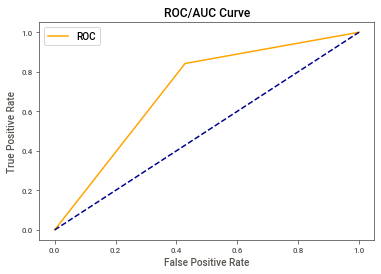

In [249]:
plt.figure(0).clf()
plot_roc_curve(fpr, tpr)

#### Random Forest

In [250]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [251]:
y_hat=rf_clf.predict(X_test)

In [252]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.88      0.71      0.79        21
           1       0.74      0.89      0.81        19

    accuracy                           0.80        40
   macro avg       0.81      0.80      0.80        40
weighted avg       0.81      0.80      0.80        40



In [253]:
F1_Score=f1_score(y_test,y_hat)
F1_Score

0.8095238095238095

In [254]:
## hyper params tuning for better result
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [255]:
rf_clf1 = RandomForestClassifier(random_state=42)

In [256]:
rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

In [257]:
rf_cv.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='f1', verbose=2)

In [258]:
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Best paramters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': False})


In [259]:
rf_clf2 = RandomForestClassifier(**rf_best_params)
rf_clf2.fit(X_train, y_train)


RandomForestClassifier(bootstrap=False, max_depth=90, min_samples_split=5,
                       n_estimators=400)

In [260]:
y_hat=rf_clf2.predict(X_test)

In [261]:
#confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix

array([[16,  5],
       [ 2, 17]], dtype=int64)

In [262]:
## calculating accuracy
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.825

In [263]:
# Precison - among all the positive predictions, how many of them actually positive
# = TP/(TP+FP)
Precision = precision_score(y_test,y_hat)
Precision

0.7727272727272727

In [264]:
# Recall - from the total positive results , how many positives are correctly predicted by the model
#= TP/(TP+FN)
Recall = recall_score(y_test,y_hat)
Recall

0.8947368421052632

In [265]:
F1_Score = f1_score(y_test,y_hat)
F1_Score           

0.8292682926829269

In [266]:
from sklearn.metrics import roc_auc_score,roc_curve ## used to compare multiple models
auc = roc_auc_score(y_test, y_hat)
print('AUC: %.2f' % auc)

AUC: 0.83


In [267]:
rl.append(['Random Forest',F1_Score, accuracy, Precision, Recall, auc])

In [268]:
#roc_curve params
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
rl_roc.append(['RF',fpr,tpr,thresholds])

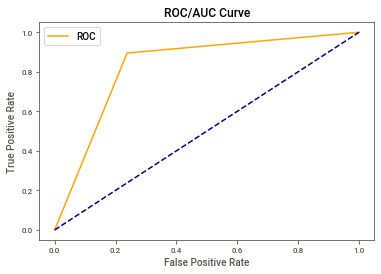

In [269]:
plt.figure(0).clf()
plot_roc_curve(fpr, tpr)
#plt.plot(fpr, tpr) #,label="rForest, auc="+str(rForest_auc))

#plt.legend(loc=0)

#### Gradient Boosting


In [270]:
## importing the model library
from sklearn.ensemble import  GradientBoostingClassifier
gbm=GradientBoostingClassifier()
gbm.fit(X_train,y_train) ## fitting the data
y_hat=gbm.predict(X_test)

In [271]:
#confusion metrix - not applicable , since they cant handle continous and binary output
#from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix

array([[18,  3],
       [ 4, 15]], dtype=int64)

In [272]:
## calculating accuracy- not applicable , since they cant handle continous and binary output
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.825

In [273]:
# Precison - among all the positive predictions, how many of them actually positive?
# = TP/(TP+FP)
Precision = precision_score(y_test,y_hat)
Precision

0.8333333333333334

In [274]:
# Recall - from the total positive results , how many positives are correctly predicted by the model?
#= TP/(TP+FN)
Recall = recall_score(y_test,y_hat)
Recall

0.7894736842105263

In [275]:
# F1 Score
F1_Score = f1_score(y_test,y_hat)
F1_Score

0.8108108108108109

In [276]:
y_hat

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [277]:
len(X_train)

160

In [278]:
len(X_test)

40

In [279]:
## evaluatin the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_hat)
print(r2)

0.29824561403508765


In [280]:
X_test.shape

(40, 13)

In [281]:
#adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
adj_r2_score = 1-(1-r2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r2_score

0.23576063446286943

In [282]:
auc = roc_auc_score(y_test, y_hat)
print('AUC: %.2f' % auc)

AUC: 0.82


In [283]:
rl.append(['Gradient boosting',F1_Score, accuracy, Precision, Recall, auc])

In [284]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
rl_roc.append(['GB',fpr,tpr,thresholds])

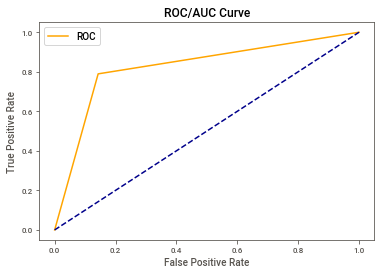

In [285]:
plt.figure(0).clf()
plot_roc_curve(fpr, tpr)

#### XGBOOST

In [286]:
import xgboost 

In [287]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 79 to 102
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ST_segment               160 non-null    int64  
 1   thallium_stress          160 non-null    int32  
 2   resting_blood_pressure   160 non-null    float64
 3   chest_pain_type          160 non-null    int64  
 4   num_major_vessels        160 non-null    int64  
 5   fasting_blood_sugar      160 non-null    int64  
 6   resting_ekg_results      160 non-null    int64  
 7   serum_cholesterol        160 non-null    float64
 8   ST_depression            160 non-null    float64
 9   sex                      160 non-null    int64  
 10  age                      160 non-null    int64  
 11  max_heart_rate_achieved  160 non-null    int64  
 12  exercise_induced_angina  160 non-null    int64  
dtypes: float64(3), int32(1), int64(9)
memory usage: 16.9 KB


In [288]:
## model creation
from xgboost import XGBClassifier
xgb_c=XGBClassifier()
xgb_c.fit(X_train,y_train)
y_hat=xgb_c.predict(X_test)

[10:49:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [289]:
#confusion metrix - not applicable , since they cant handle continous and binary output
#from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix

array([[16,  5],
       [ 3, 16]], dtype=int64)

In [290]:
## calculating accuracy- not applicable , since they cant handle continous and binary output
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.8

In [291]:
# Precison - among all the positive predictions, how many of them actually positive?
# = TP/(TP+FP)
Precision = precision_score(y_test,y_hat)
Precision

0.7619047619047619

In [292]:
# Recall - from the total positive results , how many positives are correctly predicted by the model?
#= TP/(TP+FN)
Recall = recall_score(y_test,y_hat)
Recall

0.8421052631578947

In [293]:
# F1 Score
F1_Score = f1_score(y_test,y_hat)
F1_Score

0.8

In [294]:
r2_score(y_test,y_hat)

0.1979949874686716

In [295]:
adj_r2_score = 1-(1-r2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r2_score

0.23576063446286943

In [296]:
auc = roc_auc_score(y_test, y_hat)
print('AUC: %.2f' % auc)

AUC: 0.80


In [297]:
rl.append(['XG boost',F1_Score, accuracy, Precision, Recall, auc])

In [298]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
rl_roc.append(["XGB",fpr,tpr,thresholds])

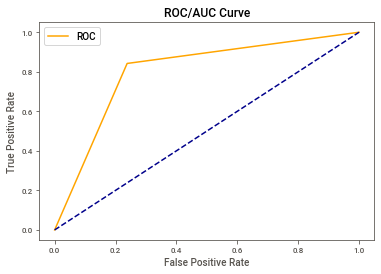

In [299]:
plt.figure(0).clf()
plot_roc_curve(fpr, tpr)

#### ----  Result analysis ----

In [300]:
res_df = pd.DataFrame(columns=['Model','F1-score','accuracy','precision','recall','auc'],data = rl)

In [301]:
res_df

,Model,F1-score,accuracy,precision,recall,auc
0,LR,0.810811,0.825,0.833333,0.789474,0.882206
1,SVM,0.714286,0.700,0.652174,0.789474,0.704261
2,KNN,0.685714,0.725,0.750000,0.631579,0.720551
3,Naive bays,0.789474,0.800,0.789474,0.789474,0.799499
4,Decision Tree,0.727273,0.700,0.640000,0.842105,0.706767
5,Random Forest,0.829268,0.825,0.772727,0.894737,0.828321
6,Gradient boosting,0.810811,0.825,0.833333,0.789474,0.823308
7,XG boost,0.800000,0.800,0.761905,0.842105,0.802005


Observations:
    
    1. While seeing at the data : we found that there were no presence of NaN values and also missing values in the dataset  
    2. The dataset contains 180 rows and 14 columns 
    3. Domain analysis : done.
    4. Univeriate analysis  - done using sweetviz and also with some individual graphs.
    5. Bivariate analysis -done using hist plot.
    6. While these analysis, we found that there are no correlation functions.
    7. For converting of categorical predictors, we have used label encoding as well as one-hot-encoding and finally adopted label-encoding for the best results. 
    8. We have employed Standardscalar method of preprocesing library, for standardizing the predictors.
    9. SMOTE() for inflating the synthetic data as the dataset is imbalanced.
    10. We have fit several model for classification problems : using SVM, Logistic-Regression, Decision-Trees, Naive-Bays,  Random-Forest, Gradient-Boosting and Xg boosting algorithms.
    11. Out of the runs on various algorithms, we have achieved/found that Gradiant Boosting/LR,Random-Forest model gives highest F1 score of 82% and 83% respectively.

In [302]:
res_df['recall'].min()

0.631578947368421

In [303]:
res_df['recall'].max()

0.8947368421052632

In [304]:
res_df['F1-score'].max()

0.8292682926829269

In [305]:
res_df['F1-score'].min()

0.6857142857142857

In [306]:
res_df['auc'].min()

0.7042606516290727

In [307]:
res_df['auc'].max()

0.8822055137844611

In [308]:
res_df.sort_values(by='auc',ascending=False)

,Model,F1-score,accuracy,precision,recall,auc
0,LR,0.810811,0.825,0.833333,0.789474,0.882206
5,Random Forest,0.829268,0.825,0.772727,0.894737,0.828321
6,Gradient boosting,0.810811,0.825,0.833333,0.789474,0.823308
7,XG boost,0.800000,0.800,0.761905,0.842105,0.802005
3,Naive bays,0.789474,0.800,0.789474,0.789474,0.799499
2,KNN,0.685714,0.725,0.750000,0.631579,0.720551
4,Decision Tree,0.727273,0.700,0.640000,0.842105,0.706767
1,SVM,0.714286,0.700,0.652174,0.789474,0.704261


#### Comparision of ROC/AUC Scores

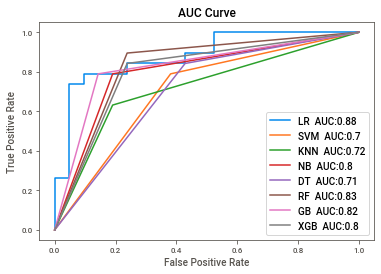

In [309]:
for i in range(0,8):    
    plt.plot(rl_roc[i][1], rl_roc[i][2],label=rl_roc[i][0] + '  AUC:' + str(round(res_df.iloc[i]['auc'],2)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend()
plt.show()

#### Conclusion: